<a href="https://colab.research.google.com/github/MaximTislenko/GB_med_stat_R/blob/main/Analysis_of_variance_03_09_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Часть II
# Методы средней сложности
Вторая часть была посвящена базовым методам обработки данных, а в этой третьей части описываются методы средней сложности. В главе 8 мы перейдем от описания взаимоотношений между двумя переменными к моделированию взаимосвязей между числовыми зависимыми переменными и наборами непрерывных и/или категориальных независимых переменных. Моделирование данных – обычно сложный многоэтапный интерактивный процесс.

В главе 8 содержится пошаговое описание методов построения линейных моделей, их оценки и интерпретации.

Глава 9 посвящена обработке результатов основных типов экспериментальных и квазиэкспериментальных исследований при помощи дисперсионного анализа и его разновидностей. В данном случае нас будет интересовать, как разные комбинации воздействующих факторов влияют на числовую зависимую переменную. В этой главе представлены функции, при помощи которых в R осуществляется дисперсионный анализ, ковариационный анализ, дисперсионный анализ для повторных измерений, а также многомерный и многофакторный дисперсионный анализ. Кроме того, мы обсудим методы оценки соответствия результатов анализа реальной ситуации и способы визуализации результатов.

При разработке экспериментальных и квазиэкспериментальных исследований важно определить размер выборки, необходимый для обнаружения интересующих нас закономерностей (провести анализ мощности). А иначе зачем же проводить исследование? Детальному обсуждению анализа мощности посвящена глава 10. Она начинается с обсуждения общих вопросов проверки гипотез, но основное внимание уделено использованию функций R для определения объема выборки, необходимого для обнаружения эффекта заданной силы с заданной степенью уверенности. Это поможет вам планировать исследования, обеспечивающие высокую вероятность получения полезных результатов.

Глава 11 – это логическое продолжение главы 6. В ней обсуждается создание диаграмм для визуализации взаимосвязей между двумя и более переменными. К таким диаграммам относятся разные типы двух- и трехмерных диаграмм рассеяния, матрицы диаграмм рассеяния, линейные графики и пузырьковые диаграммы. Так-же будут описаны полезные, но менее известные коррелограммы и мозаичные диаграммы.

Линейные модели, описанные в главах 8 и 9, подразумевают не только числовой характер зависимой переменной, но подчиненность нормальному распределению. Однако иногда нет никаких оснований предполагать нормальность распределения зависимой переменной. Поэтому в главе 12 будут описаны аналитические методы, хорошо работающие в случаях, когда данные имеют смешанное или неизвестное распределение, когда объем выборки невелик, когда часто встречаются выбросы или когда разработка подходящего критерия на основании теоретического распределения затруднена с математической точки зрения. Эти методы основаны на использовании повторных выборок и бутстреп-анализа – подходов, требующих интенсивных компьютерных вычислений и широко представленных в R. Описанные в этой главе методы позволят вам разрабатывать критерии для проверки гипотез в отношении данных, которые нельзя проанализировать с использованием традиционных параметрических методов.

К концу третьей части вы научитесь решать большинство аналитических задач, встречающихся на практике. И сможете создавать некоторые эффектные диаграммы!


# Глава 9
# Дисперсионны9й анализ
В главе 8 мы рассмотрели регрессионные модели для предсказания
значений количественной зависимой переменной по значениям
количественных независимых переменных. Однако нет никаких
причин, по которым в качестве независимых переменных нельзя
было бы использовать номинальные или порядковые факторы.
Если в набор независимых переменных входят факторы, то ак-
цент обычно смещается с предсказания на исследование межгруп-
повых различий, и такой метод называется дисперсионным анализом
(analysis of variance, ANOVA). Этот метод используется для анализа
самых разных экспериментов и квазиэкспериментов. В данной гла-
ве представлен обзор функций, имеющихся в R, которые можно
использовать для анализа результатов исследований, проведенных
по стандартным планам.
Для начала познакомимся с терминологией и обсудим общие
принципы подгонки ANOVA-моделей в R. Затем рассмотрим не-

## Многоликая регрессия
Термин регрессия может вызвать путаницу, поскольку существует множество ее разновидностей (смотри таблицу). Кроме того, в R реализован большой арсенал мощных методов подбора регрессионных моделей, и обилие имеющихся возможностей тоже может вводить в заблуждение. Например, в 2005 году Вито Риччи (Vito Ricci) составил список из 205 функций в R, которые используются для регрессионного анализа (http://mng.bz/NJhu).


\begin{array}{|l|l|}
\hline
Вид~регрессии&Где~используется\\\hline
Простая~линейная&Предсказание~значений~количественной~зависимой~переменной~по~зна-\\
~&чениям~одной~количественной~независимой~переменной\\\hline
Полиномиальная&Предсказание~значений~количественной~зависимой~переменной~по\\
~&значениям~количественной~независимой~переменной,~когда~взаимосвязь~моделируется~как~полином~n-й~степени\\\hline
Множественная&Предсказание~значений~количественной~зависимой~переменной~по~зна-\\
линейная&чениям~двух~и~более~количественных~независимых~переменных\\\hline
Многоуровневая&Предсказание~значений~зависимой~переменной~по~значениям,~имеющим\\
~&иерархическую~структуру~(например,~по~данным~об~учениках~с~группиров-\\
~&кой~по~классам~и~школам).~Этот~вид~регрессии~также~называют~иерархиче-\\
~&ской,~вложенной~или~смешанной\\\hline
Многомерная&Предсказание~значений~более~чем~одной~зависимой~переменной~по~зна-\\
~&чениям~одной~и~более~независимых~переменных\\\hline
Логистическая&Предсказание~значений~категориальной~зависимой~переменной~по~значе-\\
~&ниям~одной~и~более~независимых~переменных\\\hline
Пуассона&Предсказание~значений~зависимой~счетной~переменной~по~значениям\\
~&одной~или~более~независимых~переменных\\\hline
Пропорциональных&Предсказание~времени~до~наступления~события~(смерти,~аварии,~рециди-\\
рисков~Кокса&ва)~по~значениям~одной~или~более~независимых~переменных\\\hline
Временных~рядов&Моделирование~временных~рядов~с~коррелированными~ошибками\\\hline
Нелинейная&Предсказание~значений~количественной~зависимой~переменной~по\\
~&значениям~одной~и~более~независимых~переменных~с~использованием\\
~&нелинейной~модели\\\hline
Непараметрическая&Предсказание~значений~количественной~зависимой~переменной~по\\
~&значениям~одной~и~более~независимых~переменных~с~использованием\\
~&полученной~из~данных~и~не~заданной~заранее~модели\\\hline
Устойчивая&Предсказание~значений~количественной~зависимой~переменной~по\\
~&значениям~одной~и~более~независимых~переменных~с~использованием\\
~&метода,~устойчивого~к~выбросам\\\hline
\end{array}

В этой главе мы сосредоточимся на регрессионных методах, основанных на методе наименьших квадратов (МНК), включая простую линейную, полиномиальную и множественную линейную регрессию. Другие виды регрессии (включая логистическую и Пуассона) будут рассмотрены в главе 13.

### Когда используется МНК-регрессия
В случае МНК-регрессии значения количественной зависимой переменной предсказываются на основании взвешенной суммы значений независимых переменных, где веса переменных оцениваются, исходя из данных. Давайте взглянем на конкретный пример, взятый из публикации Fwa (2006) с упрощениями.

Инженеру нужно выявить наиболее существенные факторы, влияющие на износ мостов (такие как срок службы, интенсивность движения, тип конструкции, использованные материалы и методы, качество постройки и погодные условия), и вывести математическую формулу, описывающую их влияние. Инженер собирает все необходимые сведения в репрезентативную выборку мостов и моделирует данные при помощи МНК-регрессии.

Процесс решения задачи в высшей степени интерактивный. Инженер подбирает разные модели, проверяет их соответствие статистическим допущениям, на которых основаны эти модели, исследует все неожиданные или отклоняющиеся от нормы факты и, наконец, выбирает «лучшую» модель из многих возможных. В случае успеха полученная модель поможет инженеру:
* сосредоточиться на важных переменных, определив, какие из изученных признаков полезны для предсказания износа мостов и какие из них наиболее важны;
* отыскать мосты, находящиеся, скорее всего, в плохом состоянии, применив полученное уравнение для оценки степени износа мостов в новых ситуациях (когда значения независимых переменных известны, а степень изношенности моста – нет);
* использовать преимущества интуитивной прозорливости и выявить необычные мосты. Если инженер обнаружит, что некоторые мосты изнашиваются быстрее или медленнее, чем ожидалось, то исследование таких «выбросов» может привести к важным открытиям, которые помогут понять механизмы износа мостов.

Мосты могут быть вам неинтересны. Я занимаюсь клинической психологией и статистикой, а о строительстве не знаю почти ничего. Однако основные принципы анализа применимы к удивительно широкому спектру задач в психологии, биологии и социологии. МНК-регрессия может помочь найти ответы на каждый из следующих вопросов:
* Как связаны засоленность поверхностного стока и площадь мощеных дорог (Montgomery, 2007)?
* Какие аспекты жизненного опыта игроков обусловливают чрезмерное увлечение массовыми ролевыми сетевыми играми (Hsu, Wen, & Wu, 2009)?
* Какие характеристики образовательной среды наиболее сильно влияют на успеваемость студентов?
* Как связаны артериальное давление и количество потребляемой соли с возрастом?
* Какой вклад в увеличение площади мегаполисов вносят стадионы и наличие профессиональных спортивных команд (Baade & Dye, 1990)?
* Какие факторы влияют на цену пива в разных штатах (Culbertson & Bradford, 1991)? (Этот вопрос определенно привлек ваше внимание!)

Решающее значение имеют наша способность сформулировать интересный вопрос и умение выбрать зависимую переменную для исследования и собрать нужные данные.

### Что нужно знать
В оставшейся части этой главы я буду описывать функции R, используемые для подбора регрессионной модели МНК, оценки ее соответствия данным, проверки предположений, на которых построена модель, и выбора наилучшей модели из имеющихся. Предполагается, что у вас уже есть общее представление об МНК-регрессии. Однако я постарался свести число математических формул к минимуму и в большей степени сосредоточиться не на теории, а на практике. Существует ряд замечательных пособий, которые посвящены вошедшим в эту главу статистическим методам. Мои любимые – это «Applied Regression Analysis and Generalized Linear Models» Джона Фокса (John Fox) – в том, что касается теории, – и «An R and S-Plus Companion to Applied Regression» (2002) – в том, что касается практики. Эти два пособия послужили основным источником информации для данной главы. Хороший нетехнический обзор представлен Лихтом (Licht, 1995).

## МНК-регрессия
На протяжении большей части этой главы мы будем предсказывать значения зависимой переменной по набору независимых (это также называют регрессией зависимой переменной по независимой – отсюда и название метода) с использованием МНК (метода наименьших квадратов). МНК-регрессия позволяет подбирать модели вида:
$$\hat{Y}_{i} = \hat{\beta}_0 + \hat{\beta}_{1}X_{1i}+...+\hat{\beta}_{k}X_{ki} \subset i=1...n$$
где
* $\hat{Y}_{i}$ - предсказанное значение зависимой переменной для i-го наблюдения (а именно оценка среднего значения распределения Y по набору независимых переменных);
* $X_{ki}$ - значение k-й независимой переменной в i-м наблюдении;
* $\hat{\beta}_0$ - свободный член уравнения (предсказанное значение Y при нулевом значении всех независимых переменных);
* $\hat{\beta}_{k}$ - регрессионный коэффициент для k-й независимой переменной (угол наклона прямой, описывающей изменение Y при изменении Xk на одну единицу).

Наша цель – подобрать параметры модели (свободный член и регрессионные коэффициенты), минимизирующие различия между реальными и предсказанными значениями зависимой переменной. В частности, параметры модели должны минимизировать сумму квадратов остатков:

$$\sum_{i=1}^{n}({Y}_{i}+\hat{Y}_{i})^{2} = \sum_{i=1}^{n}({Y}_{i}-(\hat{\beta}_0 + \hat{\beta}_{1}X_{1i}+...+\hat{\beta}_{k}X_{ki}))^{2}=\sum_{i=1}^{n}\varepsilon_{i}^{2}$$

Для правильной интерпретации коэффициентов МНК-модели данные должны удовлетворять следующим требованиям:
* *нормальность* – значения зависимой переменной должны подчиняться нормальному закону распределения при фиксированных значениях независимых переменных;
* *независимость* – значения Yi не должны зависеть друг от друга;
* *линейность* – зависимая переменная линейно связана с независимыми;
* *гомоскедастичность* – дисперсия зависимой переменной постоянна при разных значениях независимых переменных. (Я мог бы назвать это свойство «однородность дисперсии», но употребление термина «гомоскедастичность» позволяет мне чувствовать себя умнее.)

Если эти требования нарушаются, то критерии значимости и доверительные интервалы могут быть вычислены неточно. Также подразумевается, что независимые переменные определяются и измеряются без ошибок, однако это требование обычно игнорируется на практике.

### Подгонка регрессионных моделей при помощи `lm()`
Для подгонки регрессионных моделей в R обычно используется
функция `lm()`. Она имеет следующий синтаксис:
```
myfit <- lm(formula, data)
```
где `formula` описывает вид подбираемой модели, а `data` – это таблица данных, используемая для создания модели. Полученный объект (в данном случае `myfit`) – это список, содержащий обширную информацию о модели. Формула `formula` обычно записывается в таком виде:
$$Y \sim  X_1 + X_2 + ... + X_k$$

где ~ отделяет зависимую переменную слева от независимых переменных (разделенных знаками +) справа. Также в формуле можно использовать другие символы:

\begin{array}{|c|l|}
\hline
Символ&Описание\\\hline
\sim&Отделяет~зависимые~переменные~(слева)~от~независимых~(справа).~Например,~пред-\\
~&сказание~значений~y~по~значениям~x,~z~и~w~можно~представить~так:~y∼ x + z + w\\\hline
+&Разделяет~независимые~переменные\\\hline
:&Обозначает~взаимосвязь~(коллинеарность)~между~независимыми~переменными.\\
~&Предсказание~значений~y~по~значениям~x~и~z~с~учетом~взаимосвязи~между~x~и~z~мож-\\
~&но~описать~как~y \sim x + z + x:z\\\hline
*& Кратко~обозначает~все~возможные~взаимосвязи.~Код~y \sim x * z * w будет развернут\\
~&в~y \sim x + z + w + x:z + x:w + z:w + x:z:w\\\hline
\wedge & Обозначает~взаимосвязь~до~определенного~порядка.~Код~y \sim (x + z + w)^2~будет\\
~&развернут~в~y~\sim x + z + w + x:z + x:w + z:w\\\hline
.&Символ-заполнитель~для~всех~переменных~в~таблице~данных,~кроме~зависимой.\\
~&Например,~если~таблица~данных~содержит~переменные~x,~y,~z~и~w,~ то~код~y\sim.~будет\\
~&означать~y \sim x + z + w\\\hline
-&Знак~минус~удаляет~переменную~из~уравнения.\\~&Например,~y \sim (x + z + w)^2 – x:w\\
~&будет~развернут~в~y \sim x + z + w + x:z + z:w\\\hline
-1&Подавляет~свободный~член~уравнения.~Например,~формула~y \sim x -1~создаст~регрес-\\
~&сионную~модель,~график~которой~будет~проходить~через~начало~координат\\\hline
I()&Элемент~в~скобках~интерпретируется~как~арифметическое~выражение.\\~&~Например,~y \sim x + (z + w)^2~означает~y \sim x + z + w + z:w.\\
~&Для~сравнения:~y \sim x + I((z + w)^2)~означает~ y \sim x + h,\\
~&~где~h~–~это~новая~переменная,~полученная~возведением~в~квадрат~суммы~z~и~w\\\hline
function&В~формулах~можно~использовать~математические~функции.\\~&Например,~log(y) \sim x + z + w\\
~& будет~предсказывать~значения~log(y)~по~значениям~x,~z~и~w\\\hline
\end{array}

В дополнение к `lm()` имеется еще несколько функций (таблица ниже), которые могут пригодиться для выполнения простого или множественного
регрессионного анализа. Каждая из них применяется к объекту, созданному вызовом функции `lm()`, чтобы получить дополнительную информацию о полученной модели.

\begin{array}{|c|l|}
\hline
Функция&Описание\\\hline
summary()&Выводит~подробную~информацию~о~модели\\\hline
coefficients()&Выводит~параметры~модели~(свободный~член~и~регрессионные~коэффициенты)\\\hline
confint()&Вычисляет~доверительные~интервалы~для~параметров~модели~(по~умолчанию~95\%)\\\hline
fitted()&Выводит~значения,~предсказанные~моделью\\\hline
residuals()&Выводит~остатки~для~модели\\\hline
anova()&Создает~таблицу~ANOVA~(дисперсионного~анализа)~для~модели~или~сравниваю-\\
~&щую~две~либо~более~моделей\\\hline
vcov()& Выводит~ковариационную~матрицу~для~параметров~модели\\\hline
AIC()&Вычисляет~информационный~критерий~Акаике~(Akaike~Information~Criterion)\\\hline
plot()&Создает~диагностические~диаграммы~для~оценки~адекватности~модели\\\hline
predict()&Использует~модель~для~предсказания~зависимой~переменной~по~новому~набору\\
~&данных\\\hline
\end{array}
Когда в регрессионной модели есть одна зависимая и одна независимая переменная, то она называется простой линейной регрессией. Когда есть одна зависимая переменная, но модель включает ее степени (например, $X^1$, $X^2$, $X^3$), то такая модель называется полиномиальной регрессией. Когда модель включает больше одной независимой переменной, то она называется множественной регрессией. Начнем с примера простой линейной регрессии, затем перейдем к примерам полиномиальной и множественной линейной регрессии и закончим примером множественной регрессии с учетом взаимосвязей между независимыми переменными.

### Простая линейная регрессия
Рассмотрим пример использования функций, перечисленных в таблице выше, на простом примере. Набор данных `women`, входящий в состав дистрибутива R, содержит данные о росте и весе 15 женщин в возрасте от 30 до 39 лет. Наша цель – научиться предсказывать вес по величине роста, что поможет выявлять женщин с чрезмерным или недостаточным весом.

In [ ]:
fit <- lm(weight ~ height, data=women)
summary(fit)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [ ]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [ ]:
fitted(fit)

1        2        3        4        5        6        7        8 
112.5833 116.0333 119.4833 122.9333 126.3833 129.8333 133.2833 136.7333 
       9       10       11       12       13       14       15 
140.1833 143.6333 147.0833 150.5333 153.9833 157.4333 160.8833

In [ ]:
residuals(fit)

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333 
          7           8           9          10          11          12 
-1.28333333 -1.73333333 -1.18333333 -1.63333333 -1.08333333 -0.53333333 
         13          14          15 
 0.01666667  1.56666667  3.11666667

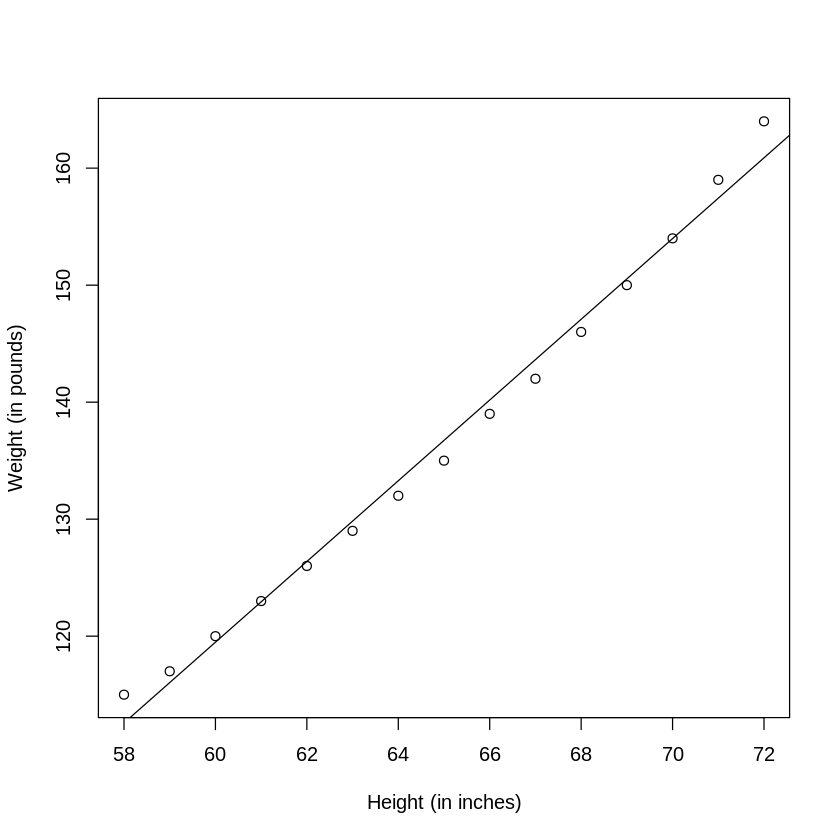

In [ ]:
plot(women$height,women$weight,
xlab="Height (in inches)",
ylab="Weight (in pounds)")
abline(fit)

Из полученных результатов следует, что уравнение для предсказания веса по росту имеет следующий вид:

$$weight = –87.52 + 3.45 × height.$$

Поскольку нулевой рост невозможен, мы не будем пытаться интерпретировать свободный член. В данном случае это просто поправочная константа. Из столбца Pr(>|t|) видно, что коэффициент регрессии (3.45) статистически значимо отличается от нуля (p < 0.001) и означает, что на каждый дюйм (1 дюйм = 2,54 см.) роста ожидается увеличение веса на 3.45 фунта (1 фунт = Почти 1,6 кг). Множественный коэффициент детерминации (0.991) означает, что модель объясняет 99.1 % дисперсии значений веса. Этот коэффициент равен квадрату коэффициента корреляции между реальными и предсказанными значениями (Такая интерпретация множественного коэффициента детерминации справедлива только для простой линейной регрессии.).

Стандартную ошибку остатков (1.53 фунта) можно интерпретировать как усредненную ошибку предсказания веса по росту с использованием данной модели. F-критерий позволяет проверить,
предсказывают ли вместе взятые независимые переменные значения зависимой переменной выше уровня вероятности. Поскольку в простой регрессии имеется только одна независимая переменная, в этом примере F-критерий эквивалентен критерию Стьюдента для коэффициента регрессии при переменной `height`.

В иллюстративных целях я вывел реальные и предсказанные значения, а также остатки (разность между предсказанными и реальными значениями). Очевидно, что наибольшие остатки характерны для самых низких и высоких женщин, что также можно видеть на диаграмме. На диаграмме заметно, что предсказание можно улучшить, используя линию с одним изгибом. Например, модель
$$\hat{X}_i=\hat{\beta}_0+\hat{\beta}_1X+\hat{\beta}_2X^2$$
может лучше соответствовать данным. Полиномиальная регрессия позволяет предсказывать зависимую переменную по независимой, если эта связь имеет вид полинома n-й степени.

### Полиномиальная регрессия
Из диаграммы выше следует, что точность предсказания можно улучшить, если использовать уравнение квадратичной регрессии (то есть включить в него член $X^2$). Получить модель в виде квадратичного уравнения можно при помощи такого выражения:
```
fit2 <- lm(weight ~ height + I(height^2), data=women)
```
Тут нужно объяснить новое обозначение: `I(height^2)`. `height^2` добавляет в уравнение рост, возведенный в квадрат. Функция `I()` интерпретирует содержимое скобок как выражение на языке R. Это необходимо, потому что оператор ^ имеет в формулах особое значение, которое нужно подавить в данном случае. В листинге ниже показан результат подгонки квадратичного уравнения.

In [ ]:
fit2 <- lm(weight ~ height + I(height^2), data=women)
summary(fit2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


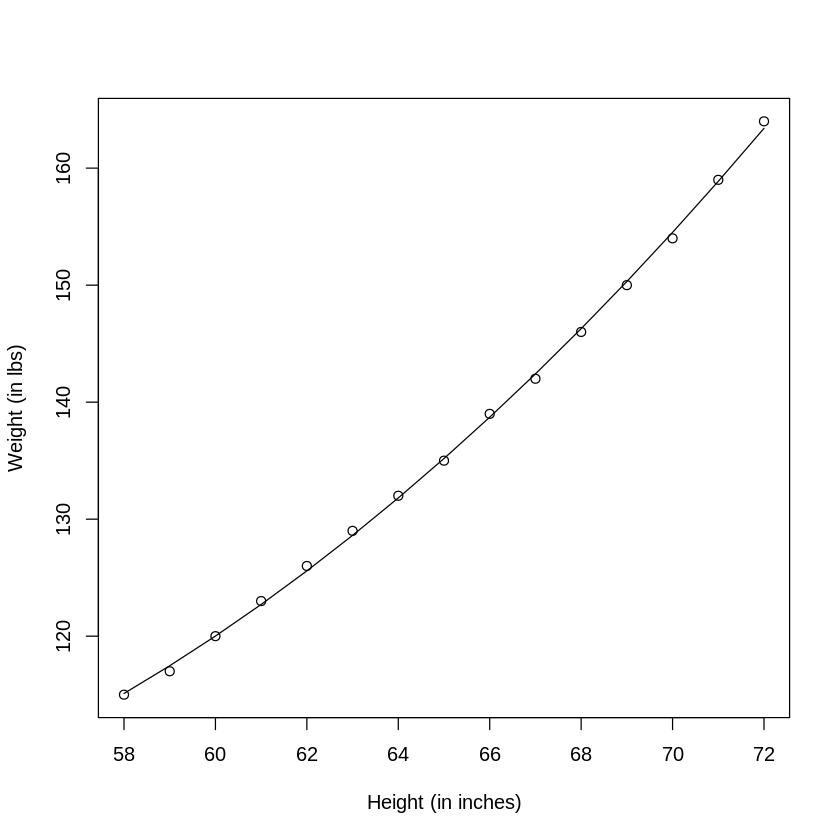

In [ ]:
plot(women$height,women$weight,
xlab="Height (in inches)",
ylab="Weight (in lbs)")
lines(women$height,fitted(fit2))

Теперь регрессионное уравнение приобретает вид
$$weight = 261.88 − 7.35 × height + 0.083 × height^2$$
и оба регрессионных коэффициента оказываются значимыми на уровне p < 0.0001. Доля объясненной дисперсии в данном случае повысилась до 99,9 %. Значимость квадратного члена (t = 13.89, p < .001) указывает на то, что его включение в модель улучшило ее адекватность. Если посмотреть на диаграмму для второй модели, то можно заметить, что кривая лучше описывает реальные данные, чем прямая линия.


>### Линейные и нелинейные модели
>Обратите внимание, что это полиномиальное уравнение по-прежнему попадает в разряд линейной регрессии. Эта модель линейная, поскольку в уравнение входит взвешенная сумма независимых переменных (в данном случае рост и квадрат роста). Даже такая модель:$$\hat{X}_i=\hat{\beta}_0+\hat{\beta}_1\log{(X_1)}+\hat{\beta}_2\sin{X_2}$$ – считается линейной (исходя из ее параметров) и описывается формулой $$Y\sim \log(X1) + \sin(X2)$$ А вот пример настоящей нелинейной модели:$$\hat{X}_i = \hat{\beta}_0 +\hat{\beta}_{1}e^{\frac{x}{\hat{\beta}_{2} }}$$Нелинейные модели этого вида можно получить при помощи функции
nls().

В общем случае полиномиальная функция n-й степени соответствует кривой с n – 1 изгибами. Для подгонки кубического полинома нужно использовать выражение:
```
fit3 <- lm(weight ~ height + I(height^2) +I(height^3), data=women)
```
Возможно применение полиномов и более высоких степеней, но я редко сталкивался с необходимостью использовать члены в степени выше третьей.



In [ ]:
fit3 <- lm(weight ~ height + I(height^2) +I(height^3), data=women)
summary(fit3)


Call:
lm(formula = weight ~ height + I(height^2) + I(height^3), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40677 -0.17391  0.03091  0.12051  0.42191 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -8.967e+02  2.946e+02  -3.044  0.01116 * 
height       4.641e+01  1.366e+01   3.399  0.00594 **
I(height^2) -7.462e-01  2.105e-01  -3.544  0.00460 **
I(height^3)  4.253e-03  1.079e-03   3.940  0.00231 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2583 on 11 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 1.679e+04 on 3 and 11 DF,  p-value: < 2.2e-16


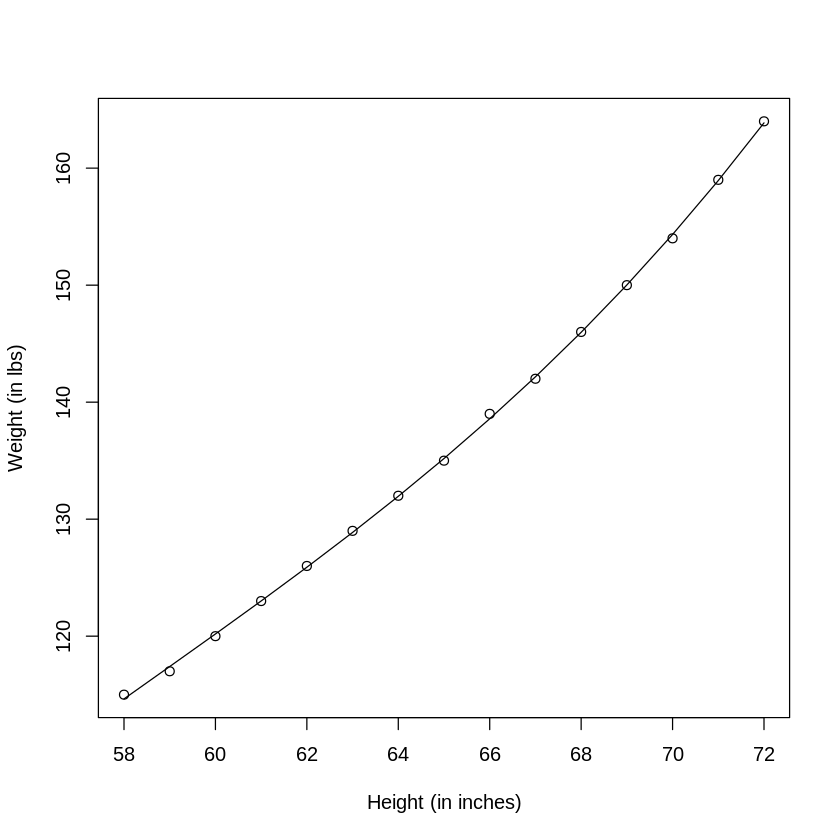

In [ ]:
plot(women$height,women$weight,
xlab="Height (in inches)",
ylab="Weight (in lbs)")
lines(women$height,fitted(fit3))

### Множественная линейная регрессия
Если существует больше одной независимой переменной, то простая линейная регрессия превращается во множественную линейную регрессию, а ход вычислений становится более сложным. Технически полиномиальная регрессия – это частный случай множественной регрессии. В квадратичной регрессии есть две независимые переменные ($X$ и $X^2$), а в кубической – три независимые переменные ($X^1$, $X^2$, $X^3$). Рассмотрим более общий пример.

Для этого примера мы используем набор данных state.x77, входящий в состав дистрибутива R, и исследуем связь между уровнем преступности и другими характеристиками для каждого штата, включая численность населения, уровень неграмотности, средний доход и морозность (среднее число дней с отрицательной температурой).

Поскольку функция `lm()` требует передать ей таблицу данных (а набор данных state.x77 хранится в виде матрицы), выполним необходимое преобразование, как показано ниже:
```
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
```
Этот код создаст таблицу данных с именем states, содержащую интересующие нас переменные. Эта таблица будет использоваться на протяжении всей главы.

Важный первый шаг во множественной регрессии – исследование связей между парами переменных. Двухмерные корреляции вычисляются при помощи функции `cor()`, а диаграммы рассеяния создаются при помощи функции `scatterplotMatrix() из пакета car (В первых версиях пакета car эта функция называлась scatterplot.matrix().

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
cor(states)

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




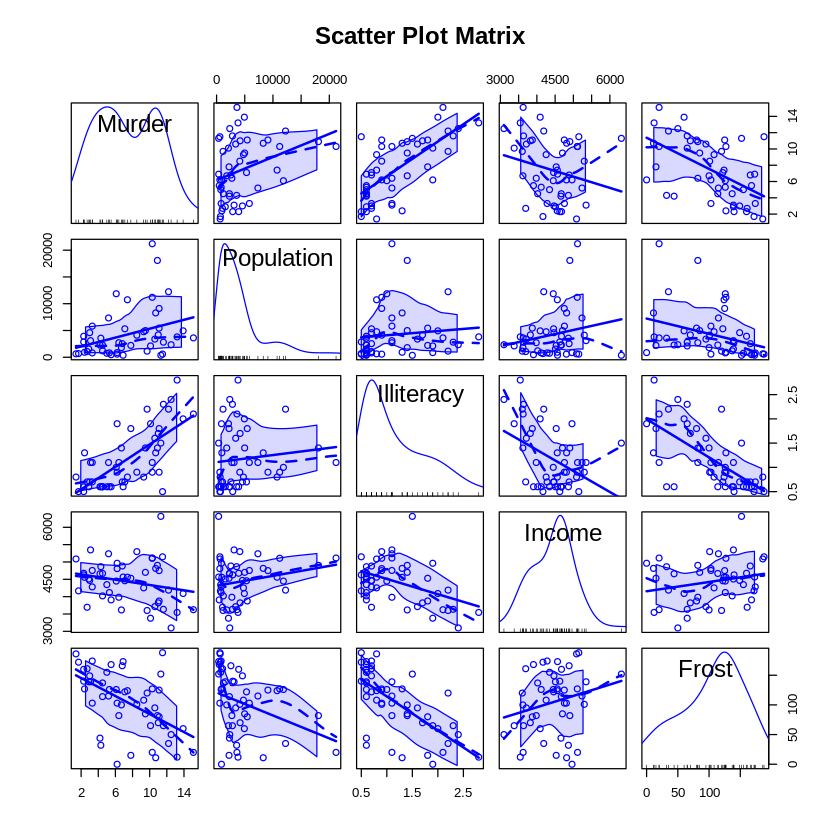

In [ ]:
install.packages("car")
library(car)
scatterplotMatrix(states, smooth=TRUE, main="Scatter Plot Matrix")

По умолчанию функция `scatterplotMatrix()` выводит графики рассеяния переменных относительно друг друга по диагоналям и накладывает на эти графики сглаживающие линии и линии линейной регрессии. Главная диагональ содержит графики плотности и графики-щетки для каждой переменной. Вывод сглаживающих линий можно подавить, передав параметр `smooth=FALSE`.
Как показано на, уровень преступности (Murder) может иметь бимодальный характер, и каждая из независимых переменных в некоторой степени искажена. Уровень преступности растет
с увеличением населения и неграмотности и снижается с ростом уровня доходов и морозности. В то же время в более холодных штатах уровень неграмотности ниже, меньше численность населения и выше доходы.

Теперь подберем модель множественной регрессии при помощи функции `lm()`

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
summary(fit)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


Если существует больше одной независимой переменной, то регрессионные коэффициенты показывают, на сколько увеличится значение зависимой переменной при изменении данной неза-
висимой переменной на единицу, при условии что все остальные независимые переменные останутся неизменными. Например, регрессионный коэффициент при переменной `Illiteracy` (уровень неграмотности) равен 4.14. Это свидетельствует о том, что увеличение неграмотности на 1 % влечет увеличение уровня преступности на 4,14 % при постоянных значениях численности населения, дохода и морозности. Этот коэффициент статистически значимо отличается от нуля при p < 0.0001. С другой стороны, регрессионный коэффициент при переменной Frost (морозность) статистически не отличается от нуля. Это говорит о том, что морозность и уровень преступности не имеют линейной зависимости при неизменных значениях всех прочих переменных. Взятые вместе, независимые переменные могут объяснить 57 % (Multiple R-squared:  0.567) дисперсии уровня преступности по штатам. До этого момента мы предполагали, что независимые переменные не взаимосвязаны между собой. В следующем разделе мы рассмотрим пример, когда это не так.

### Множественная линейная регрессия с учетом взаимосвязей
Иногда можно получить довольно интересные результаты, добавив учет взаимосвязей между независимыми переменными. Рассмотрим данные об автомобилях из таблицы данных mtcars. Допустим, что нас интересует влияние веса автомобиля и мощности двигателя на расход топлива. Можно попробовать подобрать регрессионную модель, включающую обе независимые переменные, а также учитывающую взаимосвязь между ними, как показано в листинге

In [ ]:
fit <- lm(mpg ~ hp + wt + hp:wt, data=mtcars)
summary(fit)


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


Судя по столбцу Pr(>|t|), мощность двигателя и вес автомобиля машины имеют значимую взаимосвязь. Что это означает? Значимая взаимосвязь между двумя независимыми переменными свидетельствует о том, что влияние одной независимой переменной на зависимую отчасти обусловлено значениями другой независимой переменной. В данном случае характер зависимости между расходом топлива и мощностью двигателя не одинаков для автомобилей разного веса.

Получившаяся модель предсказания величины пробега на одном галлоне топлива имеет вид:
$$mpg = 49.81 – 0.12 × hp – 8.22 × wt + 0.03 × hp × wt. $$
Для интерпретации взаимовлияния можно попробовать подставлять разные значения веса (wt), чтобы упростить уравнение. Например, можно попробовать взять среднее значение wt (3.2) и значения на одно стандартное отклонение меньше и больше среднего (2.2 и 4.2 соответственно).

Для wt=2.2 уравнение упрощается до:
$$mpg = 49.81 – 0.12 × hp – 8.22 × (2.2) + 0.03 × hp × (2.2) = 31.41 – 0.06 × hp.$$
Для wt=3.2 – до: $$mpg = 23.37 – 0.03 × hp.$$
Наконец, для wt=4.2 – до: $$mpg = 15.33 – 0.003 × hp$$
Как видите, с увеличением веса $(2.2, 3.2, 4.2)$ ожидаемое изменение mpg на единицу изменения hp уменьшается $(0.06, 0.03, 0.003)$.

Взаимовлияния можно визуализировать при помощи функции `effect()` из пакета `effect`. Она имеет следующий синтаксис:
```
plot(effect(term, mod,, xlevels), multiline=TRUE)
```
где term – это член модели, который нужно отобразить на диаграмме, mod – модель, полученная функцией lm(), а xlevels – список переменных, значения которых будут фиксированы, и самих этих значений. Параметр multiline=TRUE позволяет наложить на
диаграмму линии, а параметр lines определяет тип каждой линии (1 = сплошная, 2 = пунктирная, 3 = точечная и т. д.). Для предыдущей модели вывод диаграммы выглядит так:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mitools’, ‘RcppArmadillo’, ‘survey’, ‘estimability’, ‘insight’


lattice theme set by effectsTheme()
See ?effectsTheme for details.



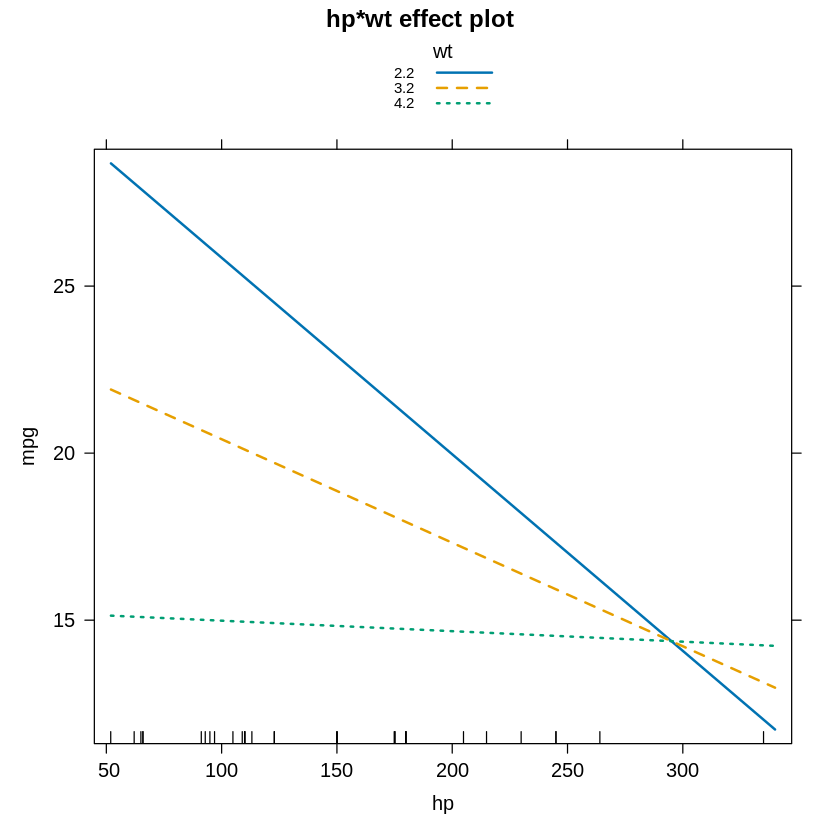

In [ ]:
install.packages("effects")
library(effects)
plot(effect("hp:wt", fit,, list(wt=c(2.2,3.2,4.2))),
lines=c(1,2,3), multiline=TRUE)

Как можно заметить на диаграмме, с увеличением веса автомобиля взаимовлияние между мощностью мотора и расходом топлива постепенно ослабевает. Для wt=4.2 линия почти горизонтальная, что говорит о незначительном изменении значений mpg при
увеличении hp.

К сожалению, подгонка модели – это только первый шаг анализа. Прежде чем делать какие-либо выводы, после этого шага нужно оценить, соответствуют ли ваши данные статистическим ограничениям примененного метода. Это тема следующего раздела.

## Диагностика регрессионных моделей
В предыдущем разделе мы использовали функцию `lm()` для подгонки МНК-модели и функцию `summary()` для получения параметров этой модели и вычисления характеризующих ее статистик.

К сожалению, ничто из этого не говорит о степени адекватности модели. Степень уверенности в параметрах регрессии зависит от того, насколько модель удовлетворяет ограничениям МНК. Функция `summary()`, приведенная в листинге, описывает модель, но она ничего не сообщает о том, насколько эта модель соответствует лежащим в ее основе статистическим ограничениям.
Почему это важно? Ошибки в данных или неверно определенные взаимосвязи между зависимыми и независимой переменными могут привести к выбору в значительной степени неточной модели. С одной стороны, вы можете решить, что между зависимой и независимой переменными нет связи, в то время как на самом деле она существует. С другой стороны, можно прийти к заключению, что зависимая и независимая переменные связаны, а на самом деле это не так! Вы также можете получить модель, которая при применении к реальным данным будет давать предсказания со значительными ошибками.
Посмотрим на результат применения функции `confint()` к набору данных states для решения задачи по множественной регрессии.

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
confint(fit)

,2.5 %,97.5 %
(Intercept),-6.552191e+00,9.0213182149
Population,4.136397e-05,0.0004059867
Illiteracy,2.381799e+00,5.9038743192
Income,-1.312611e-03,0.0014414600
Frost,-1.966781e-02,0.0208304170


Полученный результат свидетельствует о том, что можно быть на 95 % уверенными в том, что интервал [2.38, 5.90] содержит реальное значение, на которое изменяется уровень преступности, при изменении уровня неграмотности на 1 %. Кроме того, поскольку доверительный интервал для морозности (Frost) содержит ноль, можно заключить, что изменения этого параметра не связаны с уровнем преступности при постоянных значениях прочих переменных. Однако уверенность в этих результатах сильна настолько, насколько выполняются статистические допущения, лежащие в основе модели.

Набор методов под названием **диагностика регрессионных моделей** предоставляет необходимые инструменты для оценки адекватности регрессионной модели и может помочь обнаружить и устранить проблемы. Начнем со стандартного подхода c использованием функ-
ций, входящих в базовую версию R. Затем мы рассмотрим более новые, усовершенствованные методы, реализованные в пакете `car`.

### Стандартный подход
В базовой версии R реализованы многочисленные методы проверки статистических допущений. Наиболее распространенный подход – применение функции `plot()` к объекту, представляющему
результат действия функции `lm()`, в результате чего будут выведены четыре диаграммы, по которым можно оценить адекватность модели. Вот как этот подход можно применить к примеру простой линейной регрессии:

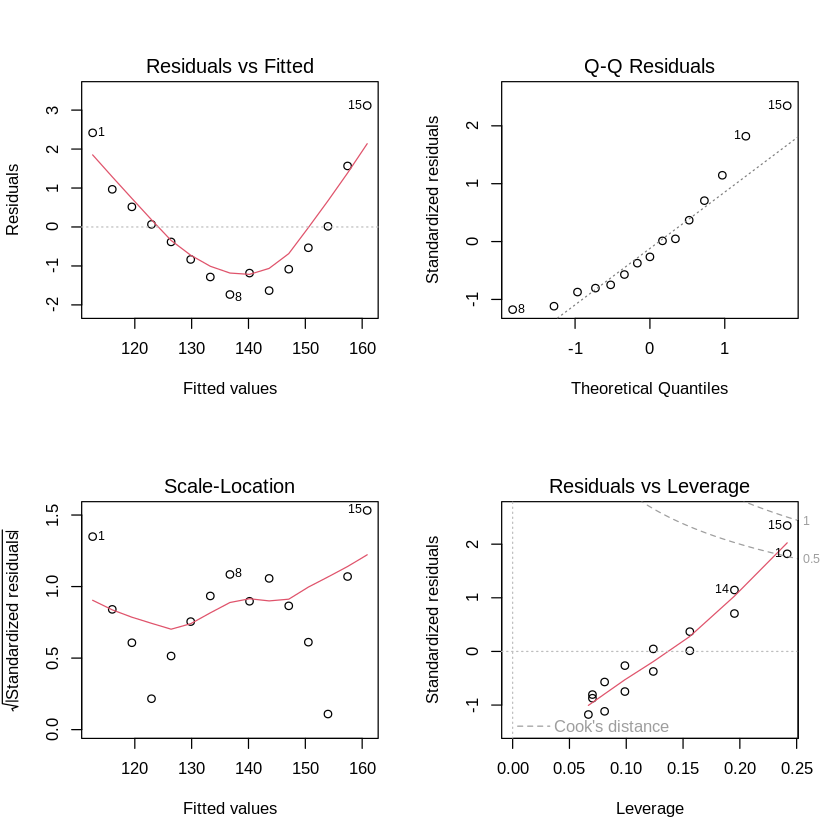

In [ ]:
fit <- lm(weight ~ height, data=women)
par(mfrow=c(2,2))
plot(fit)
par(mfrow=c(1,1))

Выражение `par(mfrow=c(2,2))` используется для размещения четырех диаграмм, создаваемых функцией `plot()`, на одной большой диаграмме 2×2. Второй вызов функции `par()` вернет одну диаграмму.

Чтобы понять эти диаграммы, нужно вспомнить допущения МНК-регрессии:
* **нормальность**. Если значения зависимой переменной нормально распределены при постоянных значениях независимых переменных, тогда и остатки (`residuals`) должны быть нормально распределены со средним значением 0. Графическая проверка данных на нормальность (Normal Q-Q – справа сверху) – это график распределения вероятностей стандартизованных остатков, наложенный на значения, которые можно было бы ожидать при нормальном распределении. Если допущение о нормальном распределении выполняется, то точки на этой диаграмме должны лежать на прямой с углом наклона в 45°. Поскольку здесь этого не наблюдается, то можно заключить, что данное допущение не выполняется;
* **независимость**. Глядя на эти диаграммы, нельзя сказать, насколько значения прогнозируемой переменной независимы. Для этого нужно понимать, как были собраны данные. У нас нет никаких оснований полагать, что вес одной женщины зависит от веса другой женщины. Если обнаружится, что данные собраны для членов одной семьи, то вам придется изменить предположение о независимости;
* **линейность**. Если зависимая переменная линейно связана с независимой, то связь между остатками и предсказанными (то есть подогнанными) значениями отсутствует. Другими словами, модель должна отражать всю закономерную изменчивость в данных, учитывая все, кроме белого шума. На диаграмме зависимости остатков от предсказанных значений (вверху слева) ясно видна нелинейная зависимость, что позволяет задуматься о добавлении квадратного члена в уравнение регрессии;
* **гомоскедастичность**. Если допущение о постоянной изменчивости выполняется, то точки на нижней левой диаграмме должны располагаться в форме полосы вокруг горизонтальной линии. Похоже, что это допущение выполняется.

Наконец, диаграмма зависимости остатков от «показателя напряженности» (англ. leverage; слева внизу) содержит информацию о наблюдениях, на которые, возможно, следует обратить особое внимание. Диаграмма выявляет выбросы, точки высокой напряженности и влиятельные наблюдения. Если говорить более конкретно, то:
* выброс – это значение, которое плохо предсказывается подобранной моделью (то есть имеет большой положительный или отрицательный остаток);
* наблюдение с большим значением напряженности описывается необычной комбинацией независимых переменных. Таким образом, это выброс в пространстве независимых переменных. Значения зависимой переменной не используются при вычислении напряженности;
* влиятельное наблюдение – это значение, которое вносит непропорциональный вклад в расчет параметров модели. Влиятельные наблюдения выявляются при помощи статистики, называемой расстоянием Кука (Cook’s distance, Cook’s D).

Честно говоря, диаграмма зависимости остатков от напряженности (справа внизу) кажется мне сложной для восприятия и малополезной. В следующих разделах вы увидите, как можно предста-
вить эту информацию более удачно.

Эти стандартные диагностические диаграммы полезны, но в настоящее время в R имеются более совершенные инструменты, и я рекомендую использовать их вместо `plot(fit)`.

### Усовершенствованный подход
В пакете car реализован ряд функций, значительно расширяющих возможности подгонки и оценки регрессионных моделей
\begin{array}{|c|l|}\hline
Функция&Описание\\\hline
qqPlot()&Диаграмма~сравнения~квантилей\\\hline
durbinWatsonTest()&Критерий~Дарбина–Уотсона~(Durbin-Watson)~на~автокорреляцию~в~остатках\\\hline
crPlots()&Диаграмма~компонент~и~остатков\\\hline
ncvTest()&Проверка~неоднородности~дисперсии~остатков\\\hline
spreadLevelPlot()&Диаграмма~для~обнаружения~неоднородности~дисперсии~остатков\\
~&(spread-level plot)\\\hline
outlierTest()&Критерий~Бонферрони~для~проверки~на~выбросы\\\hline
avPlots()&Диаграммы~добавленных~переменных\\\hline
influencePlot()&Диаграмма~влияния~наблюдений~на~регрессию\\\hline
vif()&Фактор~инфляции~дисперсии\\\hline
\end{array}

Рассмотрим все эти методы по очереди, применив их к нашему примеру множественной регрессии.
**Нормальность**

Функция qqPlot() – это более точный метод проверки предположения о нормальности, по сравнению с функцией plot(). Она изображает связь между остатками Стьюдента (также называемыми исключенными остатками Стьюдента, или остатками, вычисленными методом последовательного исключения значений, – jackknifed residuals) и квантилями распределения Стьюдента с $n – p – 1$ степенями свободы, где n – это объем выборки, а p – число параметров регрессии (включая свободный член). Вот программный код, генерирующий
эту диаграмму:

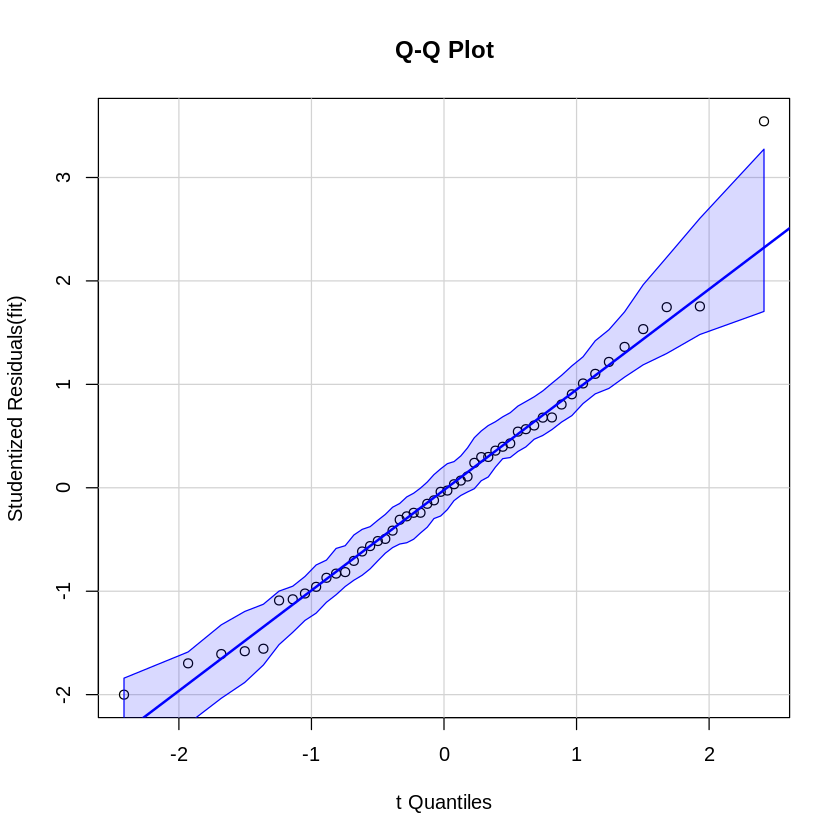

In [ ]:
library(car)
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
qqPlot(fit, labels=row.names(states), id=list(method="identify"),
simulate=TRUE, main="Q-Q Plot")

Функция qqPlot создает график распределения вероятностей, изображенный на рис. 8.6. Параметр `id=list(method="identify")` делает диаграмму интерактивной – вы можете щелкать мышью на точках графика, чтобы увидеть их значения, заданные параметром `labels`. Нажатие клавиши Esc или щелчок на кнопке Finish (Стоп) в правом верхнем углу диаграммы отключает интерактивный режим. В данном случае я выбрал точку, соответствующую штату Невада. При вызове с параметром simulate=TRUE на графике также изображаются 95%-ные доверительные границы, полученные с использованием параметрических бутстреп-методов (описаны в главе 12).

За исключением штата Невада, все остальные точки располагаются близко к линии и находятся внутри доверительных границ, что свидетельствует о нормальности распределения. Но нам опре
деленно нужно взглянуть на Неваду. Этот штат характеризуется большим положительным остатком (по сравнению с предсказанным значением), показывающим, что модель недооценивает уровень преступности в этом штате. А именно:

In [ ]:
states["Nevada",]

,Murder,Population,Illiteracy,Income,Frost
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nevada,11.5,590,0.5,5149,188


In [ ]:
fitted(fit)["Nevada"]

Nevada 
3.878958

In [ ]:
residuals(fit)["Nevada"]

Nevada 
7.621042

In [ ]:
rstudent(fit)["Nevada"]

Nevada 
3.542929

Как видите, уровень преступности составляет 11,5%, но модель предсказывает уровень 3,9%. Возникает вопрос: «Почему в Неваде уровень преступности выше, чем это предсказано по численности населения, уровню дохода, неграмотности и морозности?» Кто-нибудь (кто не смотрел фильм «Казино») хочет высказать предположение?

**Независимость остатков**

Как отмечалось выше, лучший способ понять, не связаны ли между собой значения зависимой переменной (и, таким образом, остатки), – выяснить, как происходил сбор данных. Например,
временным рядам часто свойственна автокорреляция – наблюдения, сделанные в короткие отрезки времени, могут сильнее коррелировать друг с другом, чем разнесенные во времени. В пакете `car` есть функция для проверки критерия Дарбина–Уотсона на наличие автокорреляции в остатках. Этот критерий можно применить к нашей задаче множественной регрессии, как показано ниже:

In [ ]:
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691    0.25
 Alternative hypothesis: rho != 0

Высокое значение вероятности статистической ошибки первого рода (p = 0.262) свидетельствует об отсутствии автокорреляции и, следовательно, о независимости остатков. Значение интервала (lag = 1) говорит о том, что каждое значение в наборе данных сравнивается с соседним, следующим за ним значением. Однако, будучи предназначенным для временных рядов, этот критерий не так хорошо подходит для других типов данных. Учтите, что функция durbinWatsonTest() для вычисления p использует бутстреп-метод (глава 12). Если не добавить параметр simulate=FALSE, то результаты будут немного различаться от раза к разу.

**Линейность**
Наличие нелинейной связи между зависимой и независимыми переменными можно проверить при помощи диаграмм компонент и остатков (также известных под названием диаграммы частных
остатков). Диаграммы создаются при помощи функции crPlots() из пакета car. Они помогают найти любые систематические отклонения от заданной линейной модели.

Для создания диаграммы компонент и остатков для переменной k нужно отобразить точки зависимости $$\varepsilon_{i}+\hat{\beta}_{k}\cdot X_{ik} ~~ от ~~ X_{ik}$$ ,
где остатки основаны на полной модели (содержащей все независимые переменные), а $i = 1...n$. Прямая линия на каждой диаграмме соответствует зависимости $\hat{\beta}_{k}\cdot X_{ik} ~~ от ~~ X_{ik}$ . Непараметрическое сглаживание обсуждается в главе 11. Эти диаграммы создаются при помощи следующих вызовов функций:

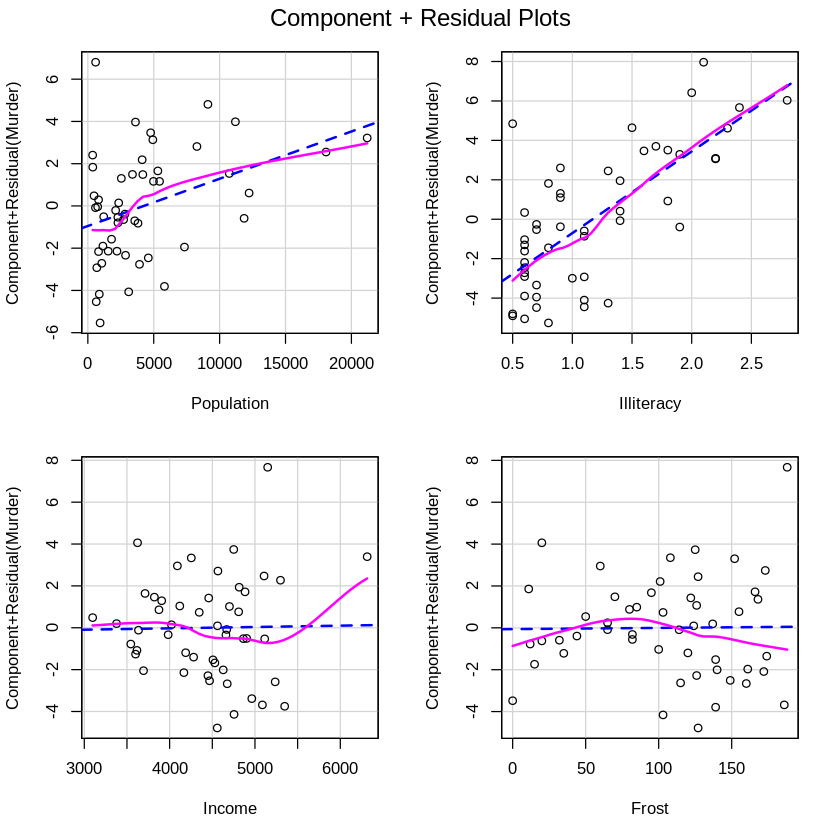

In [ ]:
crPlots(fit)

Наблюдаемая нелинейность свидетельствует о том, что функциональная форма независимой переменной была неверно смоделирована в уравнении. В этом случае может потребоваться добавить нелинейные составляющие, такие как полиномиальные члены, преобразовать одну или более переменных (например, использовать log(X) вместо X) или же отказаться от линейной регрессии в пользу какойнибудь другой ее разновидности. Преобразования обсуждаются
ниже в этой главе. Диаграммы компонент и остатков подтверждают, что требование линейности соблюдено. Вид линейной модели подходит для данного набора данных.

**Гомоскедастичность**
В пакете car также имеются две полезные функции для обнаружения неоднородности дисперсии остатков. Функция `ncvTest()` позволяет проверить гипотезу о постоянстве дисперсии остатков как альтернативу тому, что дисперсия остатков изменяется в зависимости от подобранных значений. Статистически значимый результат (p<0.05) свидетельствует о гетероскедастичности (неоднородности дисперсии остатков).

Функция `spreadLevelPlot()` создает диаграмму рассеяния для абсолютных значений стандартизованных остатков и подобранных значений с наложенной регрессионной прямой.

In [ ]:
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514, Df = 1, p = 0.18632


Suggested power transformation:  1.209626 

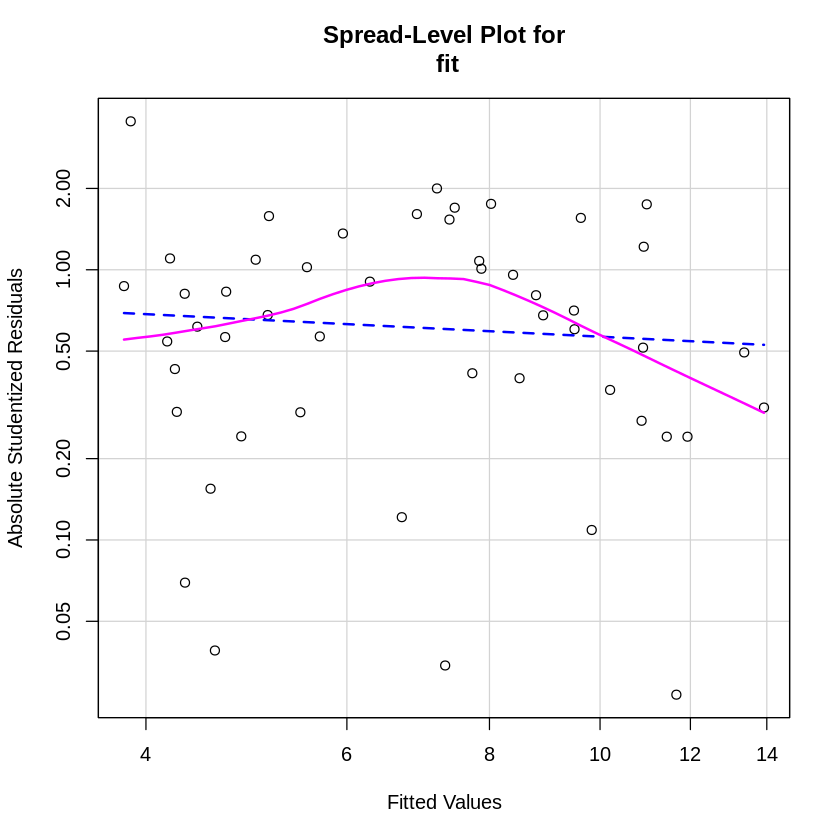

In [ ]:
spreadLevelPlot(fit)

Критерий незначим (p = 0.19), что свидетельствует о выполнении условия однородности дисперсии. То же самое можно видеть на диаграмме. Точки беспорядочно располагаются
в виде горизонтальной полосы вдоль горизонтальной регрессионной прямой. Если бы требование гомоскедастичности не выполнялось, мы увидели бы не горизонтальную прямую. Предлагаемое степенное преобразование (Suggested power transformation) в листинге
– это степень $p(Y^p)$, возведение в которую устраняет неоднородность дисперсии остатков. Например, если бы на диаграмме был показан нелинейный тренд и предлагаемое степенное преобразование было 0.5, то использование $\sqrt{Y}$ вместо $Y$ в уравнении регрессии могло бы дать модель, удовлетворяющую требованию гомоскедастичности. Если предлагаемая степень была бы равна 0, то нужно было использовать логарифмическое преобразование.
В данном случае признаки гетероскедастичности отсутствуют, и предлагаемая степень близка к 1 (никакого преобразования не требуется).

### Мультиколлинеарность
Прежде чем покинуть этот раздел, посвященный диагностике регрессионных моделей, рассмотрим еще одну проблему, не имеющую прямого отношения к статистическим допущениям, но помогающую интерпретировать результаты множественной регрессии. Представьте, что мы проводим исследование силы хвата. Набор данных включает независимые переменные, определяющие дату рождения и возраст. Вы вычисляете регрессионную модель силы хвата в зависимости от даты рождения и возраста и обнаруживаете значимый общий F-критерий при p < 0.001. Но, исследовав отдельные коэффициенты регрессии при дате рождения DOB и возрасте, обнаруживаете, что они оба незначимы (то есть нет никаких доказательств, что любой из них связан с силой хвата). Как такое получилось?

Проблема в том, что дата рождения и возраст идеально коррелируют в пределах ошибки округления. Коэффициент регрессии измеряет влияние одной независимой переменной на зависимую переменную, сохраняя неизменными все остальные независимые переменные. Это равносильно рассмотрению взаимосвязи между силой хвата и возрастом при сохранении возраста постоянным. Эта проблема называется мультиколлинеарностью (взаимозависи-
мостью независимых переменных). Она приводит к большим доверительным интервалам для параметров модели и затрудняет интерпретацию отдельных коэффициентов.

Мультиколлинеарность можно обнаружить с помощью статистики, называемой коэффициентом инфляции дисперсии (Variance Inflation Factor, VIF). Для любой независимой переменной квадратный корень из VIF сообщает степень расширения доверительного интервала для параметра регрессии при этой переменной по сравнению с моделью с некоррелированными независимыми переменными (отсюда и название). Значения VIF вычисляются с помощью функции `vif()` из пакета car. Как правило, значение VIF > 10 указывает на проблему мультиколлинеарности. Как показывают результаты, мультиколлинеарность не является проблемой для этих переменных-предикторов.

In [ ]:
vif(fit)

Population Illiteracy     Income      Frost 
  1.245282   2.165848   1.345822   2.082547

In [ ]:
vif(fit) > 10 # Это проблема

Population Illiteracy     Income      Frost 
     FALSE      FALSE      FALSE      FALSE

## Необычные наблюдения
Всеобъемлющий регрессионный анализ включает и анализ необычных наблюдений, а именно выбросов, наблюдений с высокой напряженностью и влиятельных наблюдений. Это те данные, которые требуют дальнейшего изучения: либо потому, что они каким-то образом отличаются от прочих, либо потому, что они значительно влияют на общие результаты. Рассмотрим их по очереди.

### Выбросы
**Выбросы** – это наблюдения, которые плохо предсказываются моделью. Они характеризуются большими положительными или отрицательными остатками (Yi – Yi). Положительные остатки свидетельствуют о том, что модель недооценивает зависимую переменную, а отрицательные остатки – признак переоценки.

Вы уже познакомились с одним способом обнаружения выбросов. Точки, находившиеся за пределами доверительной области, мы интерпретировали как выбросы. Приближенный метод оценки таков: стандартизованные остатки больше 2 или меньше –2 заслуживают внимания.

В пакете car имеется также статистический критерий для проверки на выбросы. Функция `outlierTest()` вычисляет значение вероятности статистической ошибки первого рода с поправкой Бонферрони для наибольшего остатка Стьюдента:

In [ ]:
outlierTest(fit)

       rstudent unadjusted p-value Bonferroni p
Nevada 3.542929         0.00095088     0.047544

Здесь можно видеть, что штат Невада классифицирован как выброс (p = 0.048). Обратите внимание, что эта функция проверяет значимость одного наибольшего (положительного или отрицательного) остатка как выброса. Если проверка не дала значимого результата, то в данных нет выбросов. А если результат значимый, то нужно удалить выброс (Имеется в виду наибольший по модулю выброс) и повторить проверку, чтобы убедиться в отсутствии других выбросов.

### Точки высокой напряженности
**Точки высокой напряженности** – это выбросы относительно других независимых переменных. Иными словами, они характеризуются необычным сочетанием значений независимых переменных. Значение зависимой переменной не используется при вычислении напряженности.

Наблюдения с высокой напряженностью идентифицируются при помощи показателя влияния (hat statisctic). Для заданного набора данных среднее значение этой статистики вычисляется как $p/n$,
где $p$ – число параметров в модели (включая свободный член), а $n$ – размер выборки. Грубо говоря, наблюдения, для которых значение этой статистики превышает среднее в два или три раза, должны анализироваться отдельно. Следующий код строит диаграмму зна-
чений показателя влияния:

integer(0)

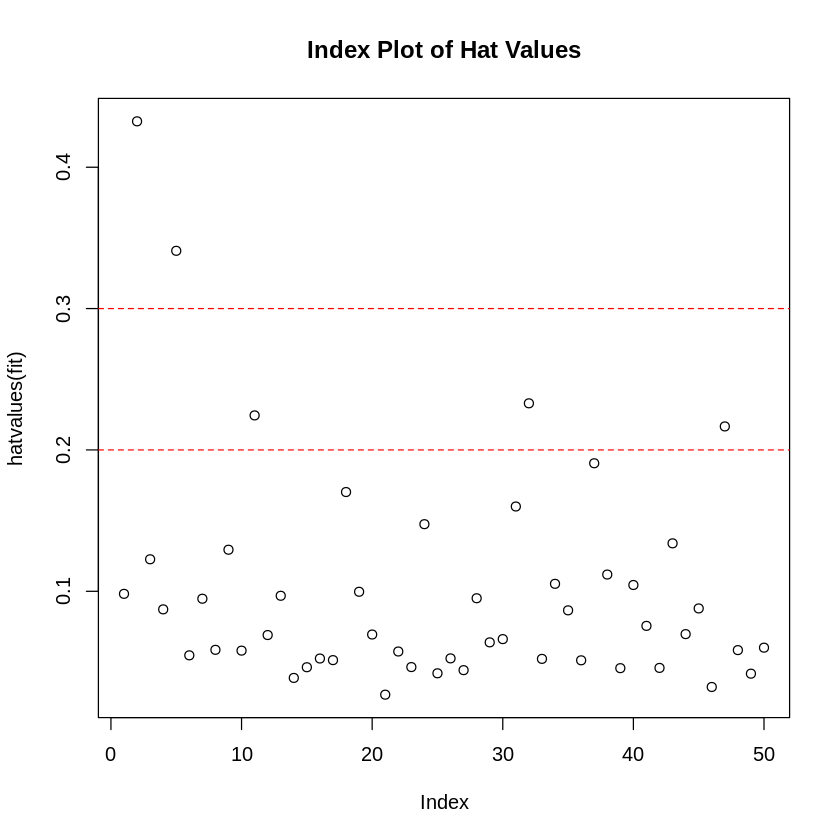

In [ ]:
hat.plot <- function(fit) {
  p <- length(coefficients(fit))
  n <- length(fitted(fit))
  plot(hatvalues(fit), main="Index Plot of Hat Values")
  abline(h=c(2,3)*p/n, col="red", lty=2)
  identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}
hat.plot(fit)

Горизонтальные линии соответствуют значениям, вдвое и втрое превышающим среднее. Функция ввода координат дает возможность выводить подписи точек в интерактивном режиме. Щелкая мышью на интересующих вас точках, можно выводить их подписи, пока не будет нажата клавиша Esc или кнопка Finish (Стоп) в правом верхнем углу диаграммы.

Здесь видно, что Аляска и Калифорния – особенно необычные наблюдения, судя по значениям независимых переменных. Для Аляски характерны более высокие доходы и более низкие численность населения и температуры. В Калифорнии, наряду с более высокими доходами, отмечены высокие численность населения и температура. Эти два штата выделяются на фоне остальных 48.

Наблюдения с высокой напряженностью могут быть, а могут и не быть влиятельными. Это зависит от того, являются ли они в то же время выбросами.

### Влиятельные наблюдения
**Влиятельные наблюдения** – это наблюдения, оказывающие непропорционально большое влияние на значения параметров модели. Представьте, что вы обнаружили значительные изменения модели при удалении единственного наблюдения. Это должно стать поводом для проверки данных на наличие влиятельных наблюдений.

Существуют два метода обнаружения влиятельных наблюдений: расстояние Кука (или D-статистика) и диаграммы добавленных переменных. Грубо говоря, значения расстояния Кука, превышающие $4/(n – k – 1)$, где $n$ – объем выборки, а $k$ – число независимых переменных, свидетельствуют о влиятельных наблюдениях. Построить диаграмму расстояний Кука можно так:

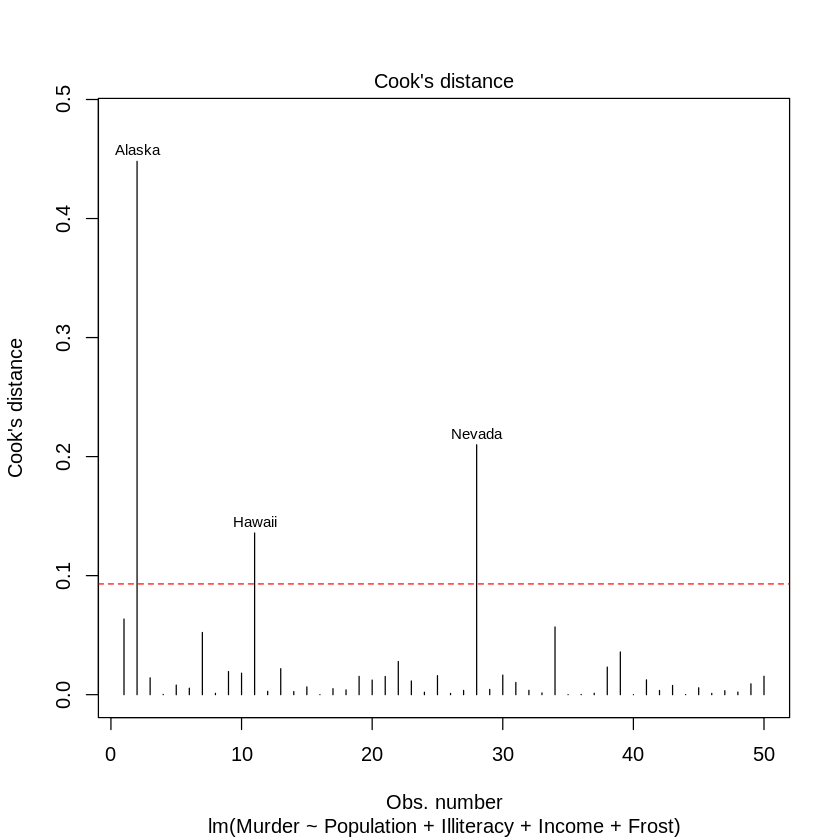

In [ ]:
cutoff <- 4/(nrow(states)-length(fit$coefficients)-2)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")

На диаграмме видно, что Аляска, Гавайи и Невада – это влиятельные наблюдения. Удаление этих штатов заметно влияет на значения свободного члена и углового коэффициента регрессионной модели. Отметим, что, несмотря на полезность применения чувствительных методов для поиска влиятельных значений, мне кажется более разумным использовать пороговое значение расстояния Кука, равное 1, а не $4/(n – k – 1)$. Если использовать критерий D = 1, то в данном наборе данных влиятельные значения не будут выявлены.

Диаграммы расстояния Кука помогают обнаружить влиятельные наблюдения, но не позволяют понять, как эти наблюдения влияют на модель. В этой ситуации приходят на выручку диаграммы добавленных переменных. Для одной зависимой и $k$ независимых переменных описанным ниже способом создается $k$ диаграмм добавленных переменных.

Для каждой независимой переменной $X_k$ отображаются остатки от регрессии зависимой переменной по остальным $k – 1$ независимым переменным. Такие диаграммы добавленных переменных можно построить при помощи функции `avPlots()` из пакета car:

Warning message in plot.window(...):
“"d" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"d" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"d" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"d" is not a graphical parameter”
Warning message in box(...):
“"d" is not a graphical parameter”
Warning message in title(...):
“"d" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"d" is not a graphical parameter”
Warning message in plot.window(...):
“"d" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"d" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"d" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"d" is not a graphical parameter”
Warning message in box(...):
“"d" is not a graphical par

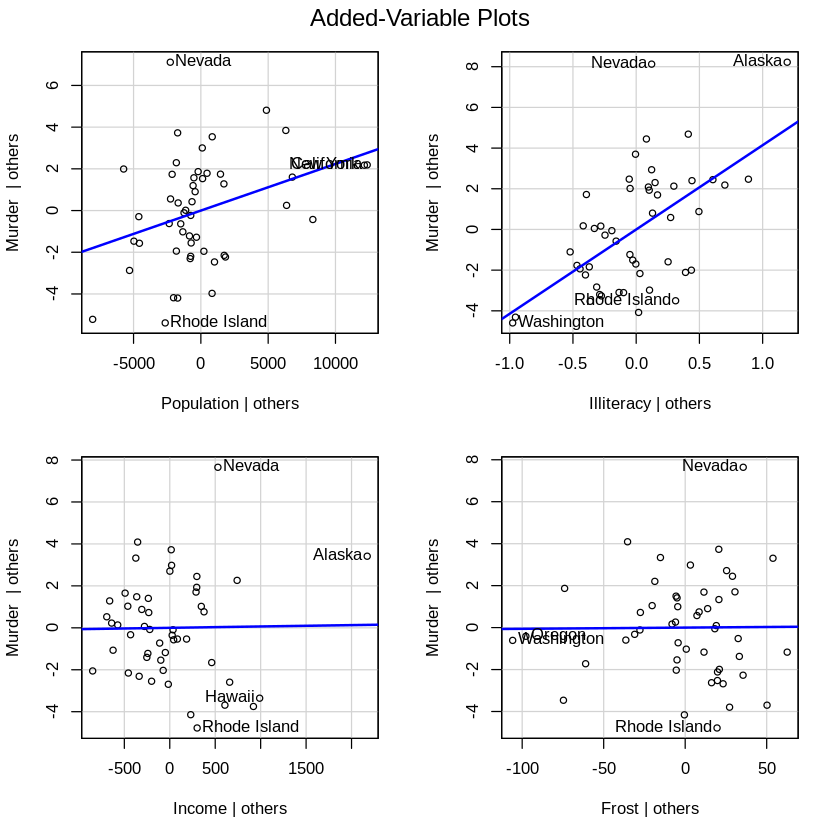

In [ ]:
library(car)
avPlots(fit, ask=FALSE, d=list(method="identify"))

Эти диаграммы создаются одновременно, и пользователи могут щелкать на точках, чтобы вывести соответствующие им подписи. Нажмите Esc или щелкните на кнопке Finish (Стоп) вверху справа на диаграмме, чтобы перейти к следующей диаграмме. Здесь я вывел название
Alaska (Аляска) на нижней левой диаграмме.

Прямая на каждой диаграмме – это регрессионный коэффициент при данной независимой переменной. Вклад влиятельных наблюдений можно оценить, если представить, как изменится линия, если удалить точку, соответствующую данному наблюдению. Для примера посмотрите на диаграмму, отражающую зависимость между преступностью и доходами (Murder | Others и Income | Others) снизу слева. Как видите, удаление точки, соответствующей штату Аляска, сместило бы линию в область отрицательных значений. На самом деле удаление Аляски приводит к изменению коэффициента регрессии при переменной дохода с положительного (.00006) на отрицательный (–.00085).

Можно свести информацию о выбросах, точках с высокой напряженностью и влиятельных наблюдениях на одну чрезвычайно информативную диаграмму при помощи функции influencePlot()
из пакета car:

Warning message in applyDefaults(id, defaults = list(method = "noteworthy", n = 2, :
“unnamed id arguments, will be ignored”


,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
Alaska,1.7536917,0.43247319,0.448050997
California,-0.2761492,0.34087628,0.008052956
Nevada,3.5429286,0.09508977,0.209915743
Rhode Island,-2.0001631,0.04562377,0.035858963


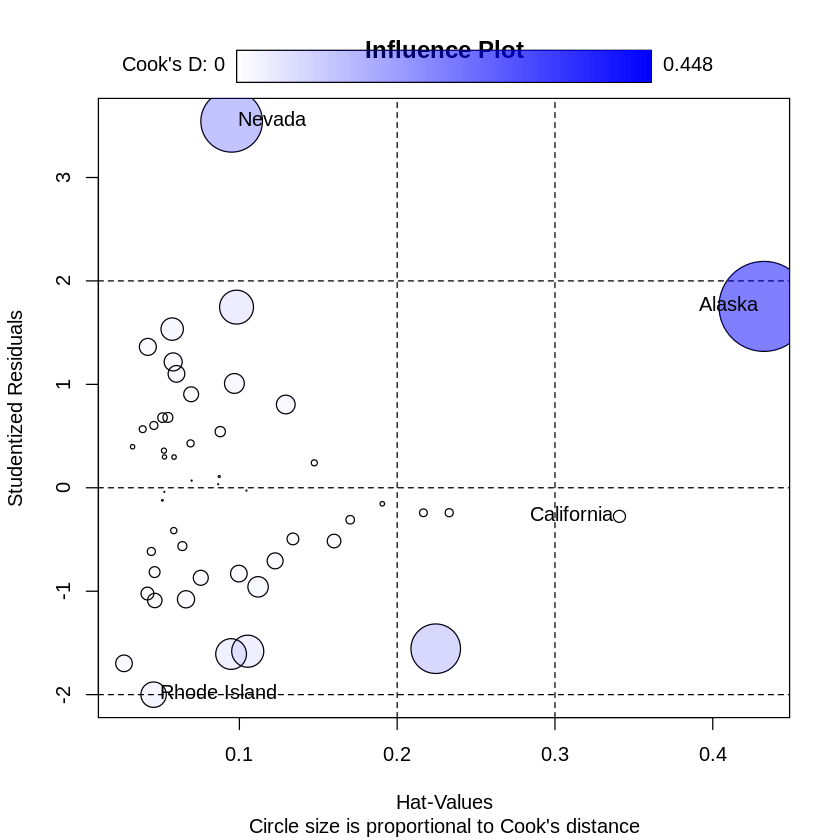

In [ ]:
library(car)
influencePlot(fit, id="noteworthy", main="Influence Plot", sub="Circle size is proportional to Cook's distance")

На полученной диаграмме видно, что Невада и Род-Айленд – это выбросы, Калифорния и Гавайи характеризуются высокой напряженностью, а Невада и Аляска – влиятельные наблюдения. Замена id="noteworthy" на id=list(method="identify") позволяет интерактивно идентифицировать точки щелчками мыши (для выхода из интерактивного режима нужно нажать клавишу Esc или щелкнуть на кнопке Finish (Стоп)).

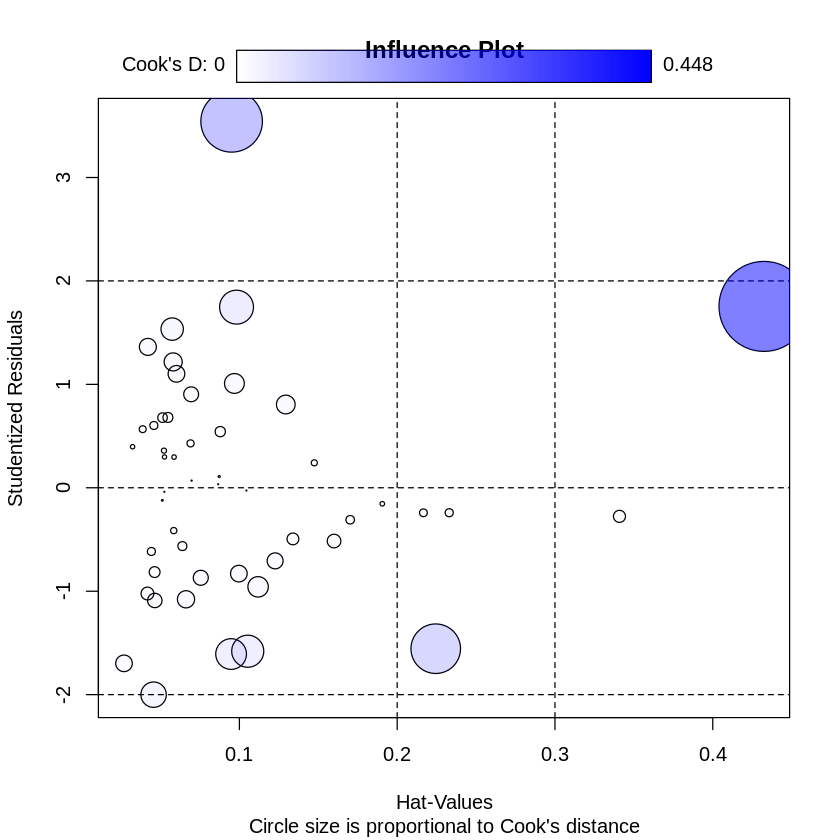

In [ ]:
library(car)
influencePlot(fit, id=list(method="identify"), main="Influence Plot", sub="Circle size is proportional to Cook's distance")

Диаграмма влияния наблюдений на регрессию (influence plot). Штаты выше +2 или ниже –2 по вертикальной оси – выбросы. Штаты выше 0.2 или 0.3 характеризуются высокой напряженностью (необычной комбинацией значений независимых переменных). Размеры кругов пропорциональны
степени влияния наблюдения. Наблюдения, обозначенные большими кругами, могут оказывать значительное влияние на параметры модели.

## Способы корректировки
Прочитав последние 16 страниц, посвященных диагностике регрессионной модели, вы могли задаться вопросом «Что делать, обнаружив проблему?». Существует четыре метода работы с отклонениями от допущений, лежащих в основе регрессионных моделей:
* удаление наблюдений;
* преобразование переменных;
* добавление или удаление переменных;
* использование регрессии другого вида.
Рассмотрим их по очереди.


### Удаление наблюдений
Удаление выбросов часто может улучшить соответствие набора данных требованию нормальности. Влиятельные наблюдения также часто удаляют, потому что они слишком сильно влияют на результаты. После удаления наибольшего выброса или влиятельного наблюдения модель подбирается заново. Если после этого все равно остаются выбросы или влиятельные наблюдения, процесс повторяется, пока не будет достигнуто желаемое соответствие модели данным.

И снова я призываю быть осторожными, принимая решение об удалении наблюдений. Иногда наличие выбросов обусловлено ошибками, допущенными при сборе данных, несоблюдением протокола исследования или нарушением тестируемым инструкции. В таких случаях удаление наблюдений, служащих камнем преткновения, является абсолютно обоснованным.

В других случаях необычные наблюдения могут оказаться самыми интересными объектами в данных. Понимание причин, почему данное наблюдение отличается от остальных, может значительно приблизить вас к разгадке изучаемой проблемы и решению других вопросов, о которых вы могли не задумываться. Некоторые наиболее серьезные достижения могут быть обусловлены интуитивной прозорливостью, когда выявляется что-то, не соответствующее
ожиданиям (извините за патетику).

### Преобразование переменных
Когда модели не отвечают требованию нормальности, линейности или гомоскедастичности, трансформация одной или более переменных может улучшить или исправить ситуацию. Преобразования обычно заключаются в замене переменной $Y$ на переменную $Y^λ$.
Часто используемые значения $λ$ и их интерпретация приведены в таблице. Если $Y$ – пропорция, то нередко используется логит-преобразование $[log_e(Y/1-Y)]$. Если график распределения $Y$ сильно асимметричен, то обычно применяется лог-трансформация.

\begin{array}{|l|c|с|c|c|c|c|c|}\hline
~~~~~~~λ&~~–2~~~&~~–1~~~&~–0.5~~~&~~~0~~~&~~0.5~~~&~~~1~~~&~~~2~~~\\\hline
Преобра-&1/Y^2&1/Y&1/\sqrt{Y}&log(Y)&\sqrt{Y}& Отсут-&Y^2\\
зование&&&&&&ствует&\\\hline
\end{array}

Если модель не соответствует требованиям нормальности, обычно пытаются преобразовать зависимую переменную. При помощи функции `powerTransform()` из пакета `car` можно оценить по методу максимального правдоподобия величину $λ$, нормализующую переменную $X^λ$. В листинге показан пример применения этого метода к набору данных `states`.


In [ ]:
library(car)
summary(powerTransform(states$Murder))

bcPower Transformation to Normality 
              Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
states$Murder    0.6055           1       0.0884       1.1227

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df     pval
LR test, lambda = (0) 5.665991  1 0.017297

Likelihood ratio test that no transformation is needed
                           LRT df    pval
LR test, lambda = (1) 2.122763  1 0.14512

Из полученного результата следует, что переменную $Murder$ можно нормализовать, заменив ее на $Murder^{0.6}$. Поскольку 0.6 близко к 0.5, можно попробовать приблизить переменную к нормальному распределению извлечением квадратного корня. Однако в данном случае гипотеза о $λ = 1$ не может быть отвергнута (p = 0.145), поэтому необходимость такого преобразования переменной неочевидна. Это согласуется с результатами анализа диагностической диаграммы, представленной выше.

> ## Интерпретация лог-трансформации
Лог-трансформация (замена фактических значений их логарифмами) часто используется для уменьшения асимметричности распределения. Например, переменная income (доход) нередко имеет правую асимметрию, когда доход большей части людей сосредоточен в нижней части шкалы, но есть несколько человек, имеющих очень высокие доходы. Как правильно интерпретировать коэффициенты регрессии при переменной, подвергнутой лог-трансформации? Обычно коэффициент регрессии при X интерпретируется как ожидаемое изменение Y при изменении X на единицу. Рассмотрим модель $Y = 3 + 0,6X$. Мы могли бы предсказать увеличение Y на 0,6 при увеличении X на одну единицу. Точно так же изменение X на 10 единиц будет связано с изменением Y на 0,6(10), или на 6 пунктов. Однако если модель является логарифмической $log_e(Y) = 3 + 0,6X$, то изменение X на одну единицу умножает ожидаемое значение Y на $e^{0,6} = 1,06$. Таким образом, увеличение X на одну единицу будет предсказывать увеличение Y на 6 %. Увеличение X на 10 единиц умножит ожидаемое значение Y на $e^{0,6(10)} = 1,82$. Таким образом, увеличение X на 10 единиц будет предсказывать увеличение Y на 82 %.

>Узнать больше об интерпретации логарифмических преобразований в линейной регрессии можно в отличном руководстве Кеннета Бенуа (Kenneth Benoit), доступном по адресу: https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf.

В том случае, когда предположение о линейности не выполняется, обычно помогает преобразование независимых переменных. Для оценки степени, в которую нужно возвести независимые переменные для большего соответствия модели требованию линейности, можно использовать функцию `boxTidwell()` из пакета `car`, реализующую метод наибольшего правдоподобия. Вот пример преобразований Бокса–Тидвелла (Box-Tidwell) для модели, предсказывающей уровень преступности по численности населения и уровню неграмотности:

In [ ]:
library(car)
boxTidwell(Murder~Population+Illiteracy,data=states)

           MLE of lambda Score Statistic (t) Pr(>|t|)
Population       0.86939             -0.3228   0.7483
Illiteracy       1.35812              0.6194   0.5388

iterations =  19 

Score test for null hypothesis that all lambdas = 1:
F = 0.23214, df = 2 and 45, Pr(>F) = 0.7938


Из результата следует, что для получения большей линейности стоит попробовать преобразования $Population^{0.87}$ и $Illiteracy^{1.36}$. Однако результаты теста для переменных Population ( p = .75) и Illiteracy (p = .54) свидетельствуют, что ни одну из них не нужно преобразовывать. Опять же, эти результаты соответствуют диаграмме компонент и остатков.

Наконец, преобразование зависимой переменной может помочь в случае гетероскедастичности (непостоянной дисперсии остатков). В листинге было показано, что функция `spreadLevelPlot()` из пакета `car` позволяет понять, в какую степень нужно возвести зависимую переменную, чтобы увеличить гомоскедастичность. И снова в примере с набором данных `states` требование постоянства дисперсии ошибок выполняется, и никакие преобразования не требуются.

>## Предостережение, касающееся преобразований
Среди статистиков ходит старая шутка: если вы не можете доказать A, докажите B и сделайте вид, что это было A (статистикам она кажется довольно смешной). В нашем случае важно, что если вы преобразовали переменные, интерпретация модели должна быть основана на
преобразованных переменных, а не на исходных. Если преобразования были осмысленными, такими как логарифм дохода или обратные значения расстояния, то трактовать полученный результат просто. А как интерпретировать взаимосвязь между частотой суицидальных настроений и кубическим корнем из депрессии? Избегайте бессмысленных преобразований.

### Добавление или удаление переменных
Изменение числа переменных, входящих в модель, будет влиять на степень ее соответствия данным. Иногда добавление важной переменной может исправить многие из проблем, которые мы обсуж дали. Удаление причиняющих беспокойство переменных может привести к аналогичному эффекту. Удаление переменных – это особенно важное средство в борьбе с мультиколлинеарностью. Если единственная задача – прогнозы, тогда мультиколлинеарность – не проблема. Однако если нужно интерпретировать отдельные независимые переменные, тогда нужно как-то исправить мультиколлинеарность. Наиболее распространенный подход – удалить одну из переменных, из-за которых наблюдается данный феномен (то есть одну из переменных с VIF > 10). Альтернативный подход – использовать гребневую регрессию, разновидность множественной регрессии, разработанную для применения в случаях мультиколлинеарности.

### Применение другого подхода
Как только что было показано, один из подходов, применяемых в случае мультиколлинеарности, – это использование другого типа модели (в данном случае гребневой регрессии). При наличии выбросов и/или влиятельных наблюдений можно использовать устойчивую регрессионную модель, а не МНК-регрессию. Если не выполняется предположение о нормальности, то можно подобрать нелинейную регрессионную модель. В случае отклонения от
независимости ошибок можно применить модели, которые учитывают структуру остатков, – такие как модели временных рядов или многоуровневые регрессионные модели. Наконец, если не выполняются предположения, лежащие в основе МНК-регрессии, можно обратиться к обобщенным линейным моделям.

Мы рассмотрим некоторые из этих альтернативных подходов в главе 13. Сложно решить, когда нужно стараться подобрать МНК-регрессионную модель, а когда использовать другой подход. Обычно такое решение основано на знании специфики исследуемого явления и выбора подхода, который даст наилучший результат.

Раз мы заговорили о наилучших результатах, обратимся к задаче выбора независимых переменных, включаемых в регрессионную модель.

## Выбор «лучшей» регрессионной модели
Составляя уравнение регрессии, вы в неявном виде сталкиваетесь с выбором из большого числа возможных моделей. Следует ли включить все исследуемые переменные или удалить те, которые не вносят значительного вклада в предсказание значений зависимой переменной? Нужно ли добавлять полиномиальные члены и/или учитывать эффекты взаимовлияния, чтобы улучшить соответствие модели данным? Выбор окончательной регрессионной модели всегда подразумевает компромисс между точностью предсказания (моделью, которая соответствует данным настолько хорошо, насколько это возможно) и экономностью (простая и легко
воспроизводимая модель). При прочих равных условиях из двух моделей с одинаковой предсказательной силой предпочтение обычно отдается более простой. В этом разделе описаны методы выбора между конкурирующими моделями. Слово «лучшей» взято в кавычки, потому что не существует единственного критерия, который можно использовать для выбора. Окончательное решение основывается на мнении исследователя (считайте это гарантией
вашей востребованности).

### Сравнение моделей
Две вложенные модели можно сравнить по степени соответствия данным при помощи функции `anova()`, входящей в базовую версию R. Вложенная модель (nested model) – это модель, все члены которой входят в другую модель. Мы обнаружили, что в нашей модели множественной регрессии для набора данных states коэффициенты при переменных Income и Frost были незначимыми. Можно проверить, будет ли модель без этих двух переменных предсказывать значения зависимой переменной так же хорошо, как и модель, в которую они включены:

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit1 <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
fit2 <- lm(Murder ~ Population + Illiteracy, data=states)
anova(fit2, fit1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47,289.2457,NA,NA,NA,NA
2,45,289.1672,2,0.07850518,0.006108462,0.993911


В данном случае модель 1 вложена в модель 2. Функция `anova()`одновременно проверяет, занижает или завышает модель предсказанные значения без переменных `Income` и `Frost` по сравнению с полным набором переменных. Поскольку результат проверки незначим (p = .994), можно заключить, что эти две переменные не увеличивают предсказательную силу модели, а значит, мы правильно решили исключить их.

Информационный критерий Акаике `(Akaike Information Criterion, AIC)` – еще один способ сравнения моделей. При расчете этого критерия учитывается статистическое соответствие модели данным и число необходимых для достижения этого соответствия параметров. Предпочтение нужно отдавать моделям с меньшими значениями `AIC`, указывающими на хорошее соответствие данным при использовании меньшего числа параметров. Этот критерий
вычисляется при помощи функции `AIC()`

In [ ]:
fit1 <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
fit2 <- lm(Murder ~ Population + Illiteracy, data=states)
AIC(fit1,fit2)

,df,AIC
,<dbl>,<dbl>
fit1,6,241.6429
fit2,4,237.6565


Значения критерия `AIC` свидетельствуют, что модель без переменных `Income` и `Frost` лучше. Учтите, что если подход с использованием `ANOVA` требует вложенных моделей, то для применения AIC это необязательно.

Сравнить две модели относительно просто, но что делать, если имеется четыре, десять или сто возможных моделей, которые нужно проанализировать? Это тема следующего раздела.

### Выбор переменных
Существуют два распространенных способа формировать окончательный набор независимых переменных из большего числа имеющихся – это пошаговый метод и регрессия по всем подмножествам.

**Пошаговая регрессия**

При пошаговом выборе переменные добавляются в модель или удаляются из нее по одной, пока не будет достигнуто заданное значение критерия. Например, при методе *пошагового включения* (forward stepwise) переменные по одной добавляются в модель, пока добавление новых переменных не перестанет ее улучшать.
При *пошаговом исключении* (backward stepwise) вы начинаете с модели, включающей все независимые переменные, а потом удаляете их по одной, пока модель не начнет ухудшаться. При `комбинированном методе` (stepwise stepwise) совмещены оба упомянутых подхода.
Переменные добавляются по одной, однако на каждом шаге происходит переоценка модели, и те переменные, которые не вносят значительного вклада, удаляются. Независимая переменная может быть включена в модель и удалена из нее несколько раз, пока не будет достигнуто окончательное решение.

Результат применения метода пошаговой регрессии зависит от критериев включения или удаления переменных. При помощи функции `step` из базовой версии R можно провести все три типа пошаговой регрессии с использованием точного критерия AIC. Код в листинге применяет метод регрессии с пошаговым исключением для решения задачи множественной регрессии.

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
step(fit, direction="backward")

Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


Мы начинаем с модели, включающей все четыре независимые переменные. В столбце AIC выводится значение одноименного критерия для модели, из которой удалена указанная в соответствующей строке переменная. Значение AIC для строки <none> (никакой) – это
значение критерия для модели, из которой не удалено никаких переменных. На первом шаге удалена переменная Frost, что привело к уменьшению AIC с 97.75 до 95.75. На втором шаге удалена переменная Income, при этом значение AIC снизилось до 93.76. Удаление остальных переменных увеличивает значение критерия, поэтому процесс остановлен.

Пошаговая регрессия – спорный подход. С его помощью можно найти хорошую модель, однако нет гарантии, что она будет лучшей, поскольку рассмотрены не все возможные модели. Обойти
это ограничение позволяет применение регрессии по всем подмножествам.

**Регрессия по всем подмножествам**

В подходе регрессии по всем подмножествам исследуются все возможные модели. Вы можете просмотреть все полученные результаты или вывести на экран только заданное число лучших моделей для каждого подмножества (одна независимая переменная, две и т. д.). Например, при значении параметра $nbest=2$ выводятся на экран две лучшие модели для одной независимой переменной, потом две лучшие модели для двух независимых переменных, затем –
для трех, и, наконец, две лучшие модели со всеми независимыми переменными.

Регрессия по всем подмножествам проводится при помощи функции `regsubsets()` из пакета `leaps`. В качестве критерия «лучшей» модели можно выбрать коэффициент R-квадрат, скорректированный коэффициент R-квадрат или Cp-статистику Мэллоуса (Mallows Cp statistic).

Как вы уже знаете, коэффициент R-квадрат (коэффициент детерминации) – это доля дисперсии зависимой переменной, объясняемая независимыми переменными. Скорректированный коэффициент R-квадрат учитывает число параметров модели. Дело в том, что коэффициент R-квадрат всегда увеличивается при добавлении независимых переменных. Когда число независимых переменных достаточно велико (по сравнению с объемом выборки), соответствие модели данным может быть переоценено. Скорректированный коэффициент R-квадрат создан с целью дать более устойчивую оценку коэффициента детерминации для генеральной совокупности. Статистика Мэллоуса тоже часто используется в качестве критерия «лучшей» модели. Считается, что для хорошей модели эта статистика должна принимать значения, близкие к числу параметров модели (включая свободный член).

В листинге показано применение регрессии по всем подмножествам к набору данных states. Результаты можно отобразить графически при помощи функции `plot()` из пакета `leaps`, но я обнаружил, что многие испытывают затруднения при интерпретации этой диаграммы. В листинге те же результаты представлены в виде таблицы, которую, как мне кажется, проще понять.

In [ ]:
install.packages("leaps")
library(leaps)
states <- as.data.frame(state.x77[,c("Murder", "Population","Illiteracy", "Income", "Frost")])
leaps <-regsubsets(Murder ~ Population + Illiteracy + Income + Frost, data=states, nbest=4)
subsTable <- function(obj, scale){
  x <- summary(leaps)
  m <- cbind(round(x[[scale]],3), x$which[,-1])
  colnames(m)[1] <- scale
  m[order(m[,1]), ]
  }
subsTable(leaps, scale="adjr2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,adjr2,Population,Illiteracy,Income,Frost
1,0.033,0,0,1,0
1,0.100,1,0,0,0
1,0.276,0,0,0,1
2,0.292,1,0,0,1
3,0.309,1,0,1,1
3,0.476,0,1,1,1
2,0.480,0,1,1,0
2,0.481,0,1,0,1
1,0.484,0,1,0,0
4,0.528,1,1,1,1


Каждая строка таблицы представляет модель. Первый столбец сообщает количество независимых переменных в модели. Второй – масштаб (в данном случае скорректированный коэффициент
R-квадрат), используемый для описания соответствия каждой модели, причем строки отсортированы по этому масштабу. (Примечание: вместо `adjr2` можно использовать другие значения шкалы. Список доступных параметров вы найдете в справке `?regsubsets`.)
Единицы и нули в строках сообщают, какие переменные включены  (1) или исключены (0) из модели.

Например, модель, основанная на единственной независимой переменной Income, имеет скорректированный R-квадрат, равный 0.033. Модель с независимыми переменными Population, Illiteracy и Income имеет скорректированный R-квадрат 0.539. Напротив, модель, использующая только независимые переменные Population и Illiteracy, имеет скорректированный R-квадрат 0.548. Здесь ясно видно, что модель с меньшим количеством независимых переменных на самом деле имеет больший скорректированный коэффициент R-квадрат (чего не может произойти с нескорректированным коэффициентом R-квадрат). Из таблицы также видно, что модель с двумя независимыми переменными (Population и Illiteracy) является наилучшей.
В большинстве случаев регрессия по всем подмножествам предпочтительнее пошаговой регрессии, потому что анализирует больше моделей. Однако если независимых переменных много, то вычисления могут занять много времени. В целом автоматизированный выбор переменных нужно рассматривать как помощь, а не определяющий фактор при выборе моделей. В конечном счете вы должны опираться на знание исследуемого предмета.

## Продолжение анализа
Закончим обсуждение регрессии знакомством с методами оценки применимости модели для генеральной совокупности и анализа относительной важности независимых переменных.

### Перекрестная проверка
В предыдущем разделе мы изучали методы выбора переменных, входящих в уравнение регрессии. Если главная задача – описание, то работа заканчивается выбором регрессионной модели и ее интерпретацией. Однако если цель – предсказание, то есть все основания спросить: «Насколько хорошо полученное уравнение работает в реальном мире?»

По определению, регрессионные методы позволяют рассчитать оптимальные для имеющегося набора данных параметры. При использовании МНК-регрессии параметры модели подбираются так,
чтобы минимизировать сумму квадратов ошибок предсказаний (остатков) и, напротив, максимизировать долю объясняемой дисперсии зависимой переменной (коэффициент детерминации). Поскольку уравнение оптимизировано для имеющегося набора данных, оно не всегда даст такие же хорошие результаты для других данных.

Мы начали эту главу с рассказа о тренере по фитнесу, который хотел предсказать число затрачиваемых человеком калорий по продолжительности выполнения им упражнений, его возрасту, полу и индексу массы тела. Если подобрать для этих данных уравнение МНК-регрессии, то получатся значения параметров модели, максимизи
рующие коэффициент детерминации этого конкретного набора данных. Однако наш тренер хочет использовать это уравнение для --предсказания числа затраченных калорий вообще, а не только для тех, кто участвовал в исследовании. Понятно, что уравнение не будет работать так же хорошо для нового набора наблюдений, но какая доля точности будет потеряна? Перекрестная проверка – полезный метод оценки применимости модели к генеральной совокупности.

При перекрестной проверке часть данных используется как обучающая
выборка, а часть – как контрольная. Уравнение регрессии подгоняется для обучающей выборки, а затем применяется к контрольной. Поскольку контрольная выборка не использовалась для подбора параметров модели, то точность предсказаний модели на этой выборке может послужить хорошей оценкой применимости полученных параметров модели к новым данным.

При k-кратной перекрестной проверке выборка делится на k подвыборок. Каждая из них играет роль контрольной выборки, а объединенные данные из оставшихся k – 1 подвыборок используются как обучающая группа. Результат применения k уравнений к k контрольным выборкам фиксируется и усредняется. Если k = n (общему числу наблюдений), то такой подход называется оценкой по методу складного ножа (последовательного исключения значений
выборки с возвратом – jackknifing).

Выполнить k-кратную перекрестную проверку можно при помощи функции `crossval()` из пакета `bootstrap`. Код в листинге ниже определяет функцию `shrinkage()` для k-кратной перекрестной проверки коэффициента детерминации.

In [ ]:
shrinkage <- function(fit, k=10, seed=1){
  require(bootstrap)
  theta.fit <- function(x,y){lsfit(x,y)}
  theta.predict <- function(fit,x){cbind(1,x)%*%fit$coef}
  x <- fit$model[,2:ncol(fit$model)]
  y <- fit$model[,1]
  set.seed(seed)
  results <- crossval(x, y, theta.fit, theta.predict, ngroup=k)
  r2 <- cor(y, fit$fitted.values)^2
  r2cv <- cor(y, results$cv.fit)^2
  cat("Original R-square =", r2, "\n")
  cat(k, "Fold Cross-Validated R-square =", r2cv, "\n")
  }

С помощью этой функции можно вычислить коэффициент детерминации и стандартную ошибку остатков и провести анализ методом перекрестной проверки (подробнее о методах бутстреп-анализа рассказывается в главе 12).

Ниже показан пример применения функции `shrinkage()` для 10-кратной перекрестной проверки с использованием всех четырех независимых переменных из набора данных `states`:

In [ ]:
install.packages("bootstrap")
library(bootstrap)
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Income + Illiteracy + Frost, data=states)
shrinkage(fit)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Original R-square = 0.5669502 
10 Fold Cross-Validated R-square = 0.3564904 


Как видите, коэффициент детерминации, вычисленный для нашей выборки (0.567), чересчур оптимистичен. Лучшая оценка доли изменчивости уровня преступности, объясняемой нашей моделью на новых данных, – это коэффициент детерминации, полученный методом перекрестной проверки (0.356). Учтите, что наблюдения разделяются на k групп случайно, поэтому при каждом использовании функции `shrinkage()` могут получаться немного отличающиеся результаты.

Перекрестную проверку можно использовать для выбора переменных, отдавая предпочтение моделям, лучше соответствующим генеральной совокупности. Например, модель с двумя независимыми переменными (Population и Illiteracy) характеризуется меньшим снижением коэффициента детерминации при перекрестной проверке (0.03), по сравнению с 0.12 для модели, включающей все переменные:

In [ ]:
fit2 <- lm(Murder ~ Population + Illiteracy,data=states)
shrinkage(fit2)

Original R-square = 0.5668327 
10 Fold Cross-Validated R-square = 0.514864 


Это обстоятельство может послужить аргументом в пользу модели с двумя переменными.

При прочих равных условиях уравнение регрессии, полученное на основании большей обучающей выборки и лучше соответствующее генеральной совокупности, при перекрестной проверке будет
оценено выше. В этом случае коэффициент детерминации будет уменьшаться не так сильно, а предсказания получатся более точными.

### Относительная важность
До этого момента мы задавались вопросом: «Какие переменные полезны для предсказания результата?» Однако иногда больше интересует ответ на вопрос: «Какие переменные наиболее важны для предсказания результата?» В таких случаях было бы желательно ранжировать переменные согласно их относительной важности. Для этого второго вопроса могут существовать практические основания. Например, имея возможность ранжировать лидерские качества по их важности для организационного успеха, можно ориентировать управленцев на более продуктивное поведение.

Если бы независимые переменные не коррелировали друг с другом, эта задача была бы простой. Можно было бы просто упорядочить независимые переменные по степени их корреляции с зависимой переменной. Однако в большинстве случаев независимые переменные коррелируют друг с другом, и это значительно усложняет дело.

Было предпринято множество попыток разработать способы оценки относительной важности независимых переменных. Самый простой – сравнить стандартизированные коэффициенты регрессии. Они характеризуют ожидаемое изменение зависимой переменной (выраженное в числе стандартных отклонений) при изменении отдельной независимой переменной на одно стандартное отклонение при постоянных значениях прочих независимых переменных.

В R стандартизированные регрессионные коэффициенты можно получить, предварительно преобразовав все переменные при помощи функции `scale()` так, чтобы их среднее было равно 0, а стандартное отклонение – 1. Но имейте в виду, что функция `scale()` возвращает матрицу, а функция `lm()` принимает таблицы данных, поэтому необходимо выполнить промежуточный шаг, изменяющий формат данных. Программный код и результаты его применения к нашей задаче множественной регрессии приведены ниже:

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
zstates <- as.data.frame(scale(states))
zfit <- lm(Murder~Population + Income + Illiteracy + Frost, data=zstates)
coef(zfit)

(Intercept)    Population        Income    Illiteracy         Frost 
-8.272891e-17  2.705095e-01  1.072372e-02  6.840496e-01  8.185407e-03

Здесь видно, что увеличение уровня неграмотности ($Illiteracy$) на одно стандартное отклонение влечет увеличение уровня преступности ($Murder$) на 0.68 стандартного отклонения при постоянных значениях численности населения ($Population$), дохода ($Income$) и морозности ($Frost$). Исходя из стандартизированных регрессионных коэффициентов, неграмотность – наиболее важный параметр, а морозность – наименее важный.

Было предпринято много других попыток количественной оценки относительной важности независимых переменных. Относительную важность можно выражать в виде вклада каждой переменной в коэффициент детерминации (как поодиночке, так и в сочетании с другими независимыми переменными). Несколько возможных подходов к оценке относительной важности реализованы в пакете `relaimpo`, созданном Ульрике Грёмпингом (Ulrike Grömping) (http://mng.bz/KDYF).

Новый метод, названный относительным взвешиванием, выглядит довольно многообещающим. Этот метод довольно точно аппроксимирует среднее увеличение коэффициента детерминации при добавлении независимой переменной во все возможные подмодели (Johnson, 2004; Johnson, Lebreton, 2004; LeBreton, Tonidandel, 2008). Функция для вычисления относительных весов представлена в листинге ниже

In [ ]:
relweights <- function(fit,...){
  R <- cor(fit$model)
  nvar <- ncol(R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt / rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model[2:nvar])
  names(import) <- "Weights"
  import <- import[order(import),1, drop=FALSE]
  dotchart(import$Weights, labels=row.names(import),
  xlab="% of R-Square", pch=19,
  main="Relative Importance of Predictor Variables",
  sub=paste("Total R-Square=", round(rsquare, digits=3)),
  ...)
  return(import)
  }

In [ ]:
relweights <- function(fit,...){
  R <- cor(fit$model)
  nvar <- ncol(R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt / rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model[2:nvar])
  names(import) <- "Weights"
  import <- import[order(import),1, drop=FALSE]
  dotchart(import$Weights, labels=row.names(import),
           xlab="% of R-Square", pch=19,
           main="Relative Importance of Predictor Variables",
           sub=paste("Total R-Square=", round(rsquare, digits=3)),
           ...)
  return(import)
  }

>**ПРИМЕЧАНИЕ.** Код в листинге выше – это адаптированная программа SPSS, любезно предоставленная др. Джонсоном (Dr.Johnson). В своей статье (Johnson, 2000, Multivariate Behavioral Research, 35, 1–19) он объясняет, как вычисляются относительные веса.

В листинге показано применение функции `relweights()` для предсказания уровня преступности по численности населения, уровню неграмотности, дохода и морозности в наборе данных `states`.

In [ ]:
relweights <- function(fit,...){
  R <- cor(fit$model)
  nvar <- ncol(R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt / rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model[2:nvar])
  names(import) <- "Weights"
  import <- import[rank(import), 1, drop=FALSE]
  dotchart(import$Weights, labels=row.names(import),
           xlab="% of R-Square", pch=19,
           main="Relative Importance of Predictor Variables",
           sub=paste("Total R-Square=", round(rsquare, digits=3)),
           ...)
  return(import)
  }

,Weights
,<dbl>
Illiteracy,59.000195
Frost,20.787442
Population,14.723401
Income,5.488962


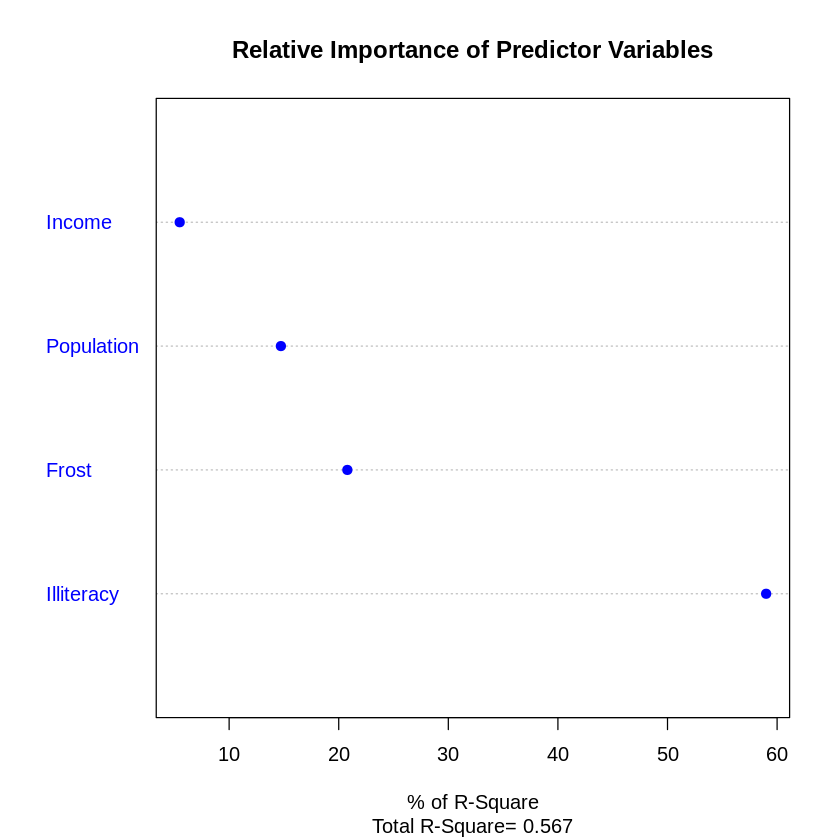

In [ ]:
states <- as.data.frame(state.x77[,c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
relweights(fit, col="blue")
# fit

# Итоги
* Регрессионный анализ – сложный многоэтапный интерактивный процесс, включающий подбор моделей, оценку их соответствия статистическим предположениям, модификацию данных и моделей, а также перенастройку для получения окончательного результата.
* Диагностика регрессионных моделей проводится с целью оценить соответствие данных статистическим предположениям и выбрать методы модификации модели или данных для более точного соответствия этим предположениям.
* Доступно множество самых разных методов выбора переменных для включения в окончательную регрессионную модель, в том числе критерии значимости, статистики оценки соответствия и автоматизации принятия решений, таких как пошаговая регрессия и регрессия всех подмножеств.
* Для оценки вероятной эффективности прогностической модели на новых выборках данных можно использовать перекрестную проверку.
* Метод относительного взвешивания позволяет справиться с решением сложной задачи оценки важности переменных и определить, какие переменные являются наиболее важными для прогнозирования результата.